# Credit card fraud detection

The dataset used is from kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud

<b>GOAL:</b> 
Detecting whether a transaction in a is a  normal payment or fraud.

<b>Introduction:</b>
<p> Fraud detection is a big challange for the credit card companies. This is because of the huge volume of transactions that are completed each day and many fraudulent transactions look a lot like normal transactions.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers feel safe and are not charged for items that they did not purchase.</p>

<p>The dataset for this project is taken from Kaggle. This data will be used to train ML models. Further ahead the performance of these models will be evaluated.<p>

<b>DataSet:</b>  
    
<p> The dataset contans around 280,000 transactions carried out by Eurpoean cardholders in September 2013 spanning over two days. The dataset is highly unbalanced with fraud transaction constuitution barely 0.172% of all transactions. <p>
    
<p> Due to the confidentiality issues the multidimensional dataset is transformed in to its principal components using PCA. Attributes V1..V28 are the top 28 principal components which are provided in the dataset. In addition to that there are two other input columns - the transaction 'Amount' and 'Time' which contains the time elapsed since the first transaction in seconds. The outfut feature 'Class' is the last column which assumes binary value 1 or 0 depending on either the transaction if fradulant or genuine. <p>
    
<p> Dealing with the imbalanced datasets will give a high accuracy we will evaluate the models by using f1-score, precision/recall score and Roc_curv and confusion matrix<p>   
    
<b>PROBLEM STATEMENT:</b> 
The objective of this project is to design an ML binary classifier which can successfully identify the fraudulant vs non/fraudulant transactions. To build this classifier, dataset with over 280k transaction data is provided. 28 PCA transformed variables are provided which are the key features used for building the classifier. In addition to these, two additional input variables are the 'Time of transaction' and the 'Amount'. From the T-SNE multi-dimensional plot, it can seen that the classes are well separated. The dataset is heavily imbalanced with more than 98% transactions belonging to one class. Resampling is done to balance the classes and ML models are applied to this data. Performance of ML models is checked using the AUC\ROC curves and comparision between F1-score, Recall, Precision scores.


<b>ML ALGORITHMS:</b> 
    The algorithms used are
- Logistic Regression (LR)
- Random Forest (RF)
- Decision Tree (DT)
- Support Vector Machine
- K Nearest Classifier
- Gradient Bossting Technique
- Simple Neural Network

<b>STEPS:</b>
<ol>
<li>Loading and understanding the dataset</li>
<li>Preprocessing: Exploring the Data, Cleaning and Visualization</li>
<li>Baseline: Apply Machine learning models and evalulation through Cross validation</li>
<li>Splitting the dataset & scaling after splitting</li> 
<li>Build a Neural Network, fitting the data and evalution before sampling</li> 
<li>Handling imbalanced Dataset (undersamling: near miss, ... & oversamling: SMOTE, ...)</li>
<li>Apply machine learning models after sampling: Fitting and utilization of Machine learning algorithms</li>
<li>Apply a Neural Network, fitting the data and evalution After sampling</li> 
<li>Evaluating the Models</li>
<li>A comparison of models accuracy</li>

<b>REFERENCES:</b>
1. Account Number Verification Service - A quick method to verify accounts. VISA, 2016, https://usa.visa.com/dam/VCOM/global/support-legal/documents/acct-numb-verif-service-a-quick-method-to-verify-accounts-vbs-07-jun-16.pdf
2. pandas.DataFrame.corr. the pandas development team, 2021, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html (accessed 22.11.2021)
3. sklearn.manifold.TSNE. scikit-learn developers, 2021, https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html (accessed 22.11.2021)
4. Géron, Aurélien. Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow : Concepts, Tools, and Techniques to Build Intelligent Systems. Second ed., O'Reilly, 2019.
5. Pedro Coelho, Luis, et al. Building Machine Learning Systems with Python. Packt Publishing, Limited, 2018.
6. Decision Trees. scikit-learn developers, 2021 https://scikit-learn.org/stable/modules/tree.html (accessed 23.11.2021)
7. Undersampling Algorithms for Imbalanced Classification. Jason Brownlee, 2020, https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/ (accessed 23.11.2021)
8. Validation curves: plotting scores to evaluate models. https://scikit-learn.org/stable/modules/learning_curve.html
9. Learning Curves Explained with Python Sklearn Example. https://vitalflux.com/learning-curves-explained-python-sklearn-example/


Further references (Practical hints):

- https://blog.bigml.com/2016/09/28/logistic-regression-versus-decision-trees/
- https://www.kaggle.com/hazratnit/credit-fraud-detection
- https://www.kaggle.com/creepycrap/credit-card-fraud-funky-ml
- https://youtu.be/NCgjcHLFNDg
- https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
- https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial
- https://www.sciencedirect.com/topics/computer-science/logistic-regression
- https://www.datacamp.com/tutorial/random-forests-classifier-python
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html 

<b>DIVISION OF WORK</b>
We would like to point out that the work was done collaboratively among all of us. Project contributors are:
- <b>Shaima</b>: BaseLine, Cross validation, Build a Neural Network, fitting the data and evalution before sampling and after sampling, Handling Imbalanced Dataset (Over sampling, over_undersampling techniques), Presentation.   
- <b>Vinothini & Rihab</b>: Splitting the dataset & scaling after splitting, Applying machine learning models after sampling: Fitting and utilization of Machine learning algorithms, Evaluating the Models (using confusion matrix, classification reports, Roc_curv plot), Presentation.
- <b> Priyala</b>: Loading and understanding the dataset, Preprocessing: Exploring the Data, Cleaning and Visualization, Report & discussion.
- <b>Bora</b>: Handling Imbalanced Dataset and apply Under sampling techniques (Random undersampling, Nearmiss), Evalutions (Accuracy, Precision, Recall, F1-score) for all ML models, Presentation.


In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
#============================================================


# Define a random seed to make the output the same every run
seed_num = 42
np.random.seed(seed_num)

### 1. Loading, understanding, and exploration the datase

In [2]:
# Import the dataset
data = pd.read_csv('./creditcard.csv')
# The dataset is imported and the first five rows are shown.
# Head of dataset
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


This confirms the dataframe setup as described in kaggle: Columns are 'Time' and 'Amount', as well as further input columns named V1 to V28. The last column is called 'Class' that indicates wether the input data is fraud or non-fraud.

The last five rows of the dataset are shown.

In [3]:
# Tail of dataset
data.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# Dimensions of dataset
data.shape

(284807, 31)

The dataset dimensions are shown above. It is composed of 284807 rows and 31 columns.

In [5]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### 2. Preprocessing: Exploring the Data, Cleaning and Visualization

In [3]:
# Check NULL data
null = data.isnull().sum().sum()
print('Total number of NULL values in the dataset: ' +str(null))

Total number of NULL values in the dataset: 0


- As we see above from the data info that there are no null values in the dataset. All the colums except the 'Class;' is of type float. The column 'Class' which is the response variable is of type integer. 
- Since there are no NULL values we do not need to discard any rows.

- Next, the presence of duplicates in the dataset is checked as follows.

In [4]:
# Check duplicated rows
duplicates = data[data.duplicated()]
print("The shape o the duplicates:\n", duplicates.shape)
print("="*100)
# Duplicated transactions in dataset
print("Duplicated Rows:\n", duplicates['Class'].value_counts())
# Drop duplicates
print("Drop the duplicated rows")
data.drop_duplicates(inplace = True)
print("="*100)
print("The shape after we drop the duplicates:\n", duplicates.shape)

The shape o the duplicates:
 (1081, 31)
Duplicated Rows:
 0    1062
1      19
Name: Class, dtype: int64
Drop the duplicated rows
The shape after we drop the duplicates:
 (1081, 31)


- 1081 duplicated rows are found in the dataset.These duplicated rows need to be dropped from the dataset.
- The duplicates have been dropped. As we can see see that there are now 283726 rows of data remaining. 

- Following, statistics for each column of the dataframe are shown. First conclusions about the data can be drawn, which are elaborated with further investigations below.

In [8]:
# Get statistics of dataframe for each column
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


- There is a lot of variation in the PCA derived properties V1..V28 especially quite different minimum and maximum values.  The mean values are all close to zero and standard deviation is quite small ( less than 2) which shows that lot of values are concentrated around the mean. 
- This is further shown in the plots below. 

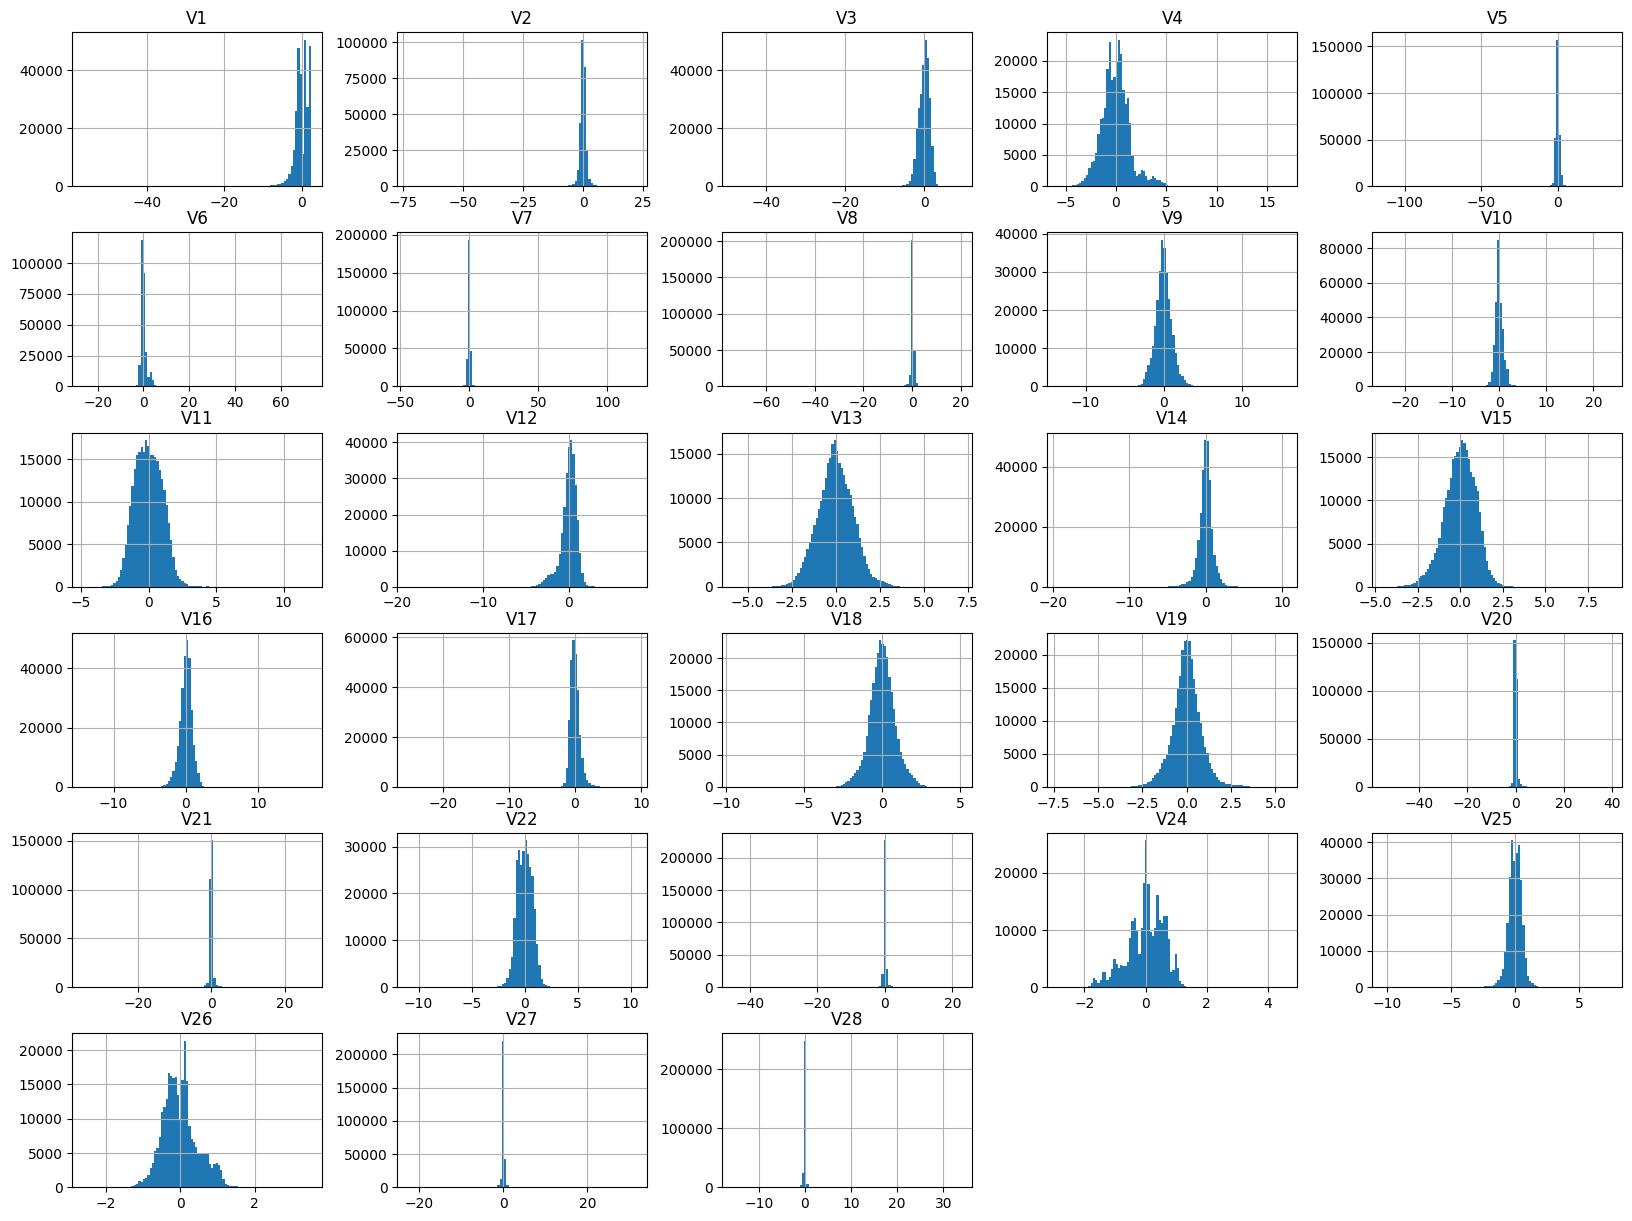

In [5]:
features = list(data.columns[1:29])
data.hist(features,  figsize = (20,15), bins= 100)
plt.show()


- The above plot shows the histograms for features V1..V28. Again we see that all the features are centered around its mean. Also we can see that some of the features show a Normal (Gaussian) distribution shape. 
- The fraudulent transaction data is contrasted to Normal data in a histogram visualization, as follows.

<AxesSubplot: >

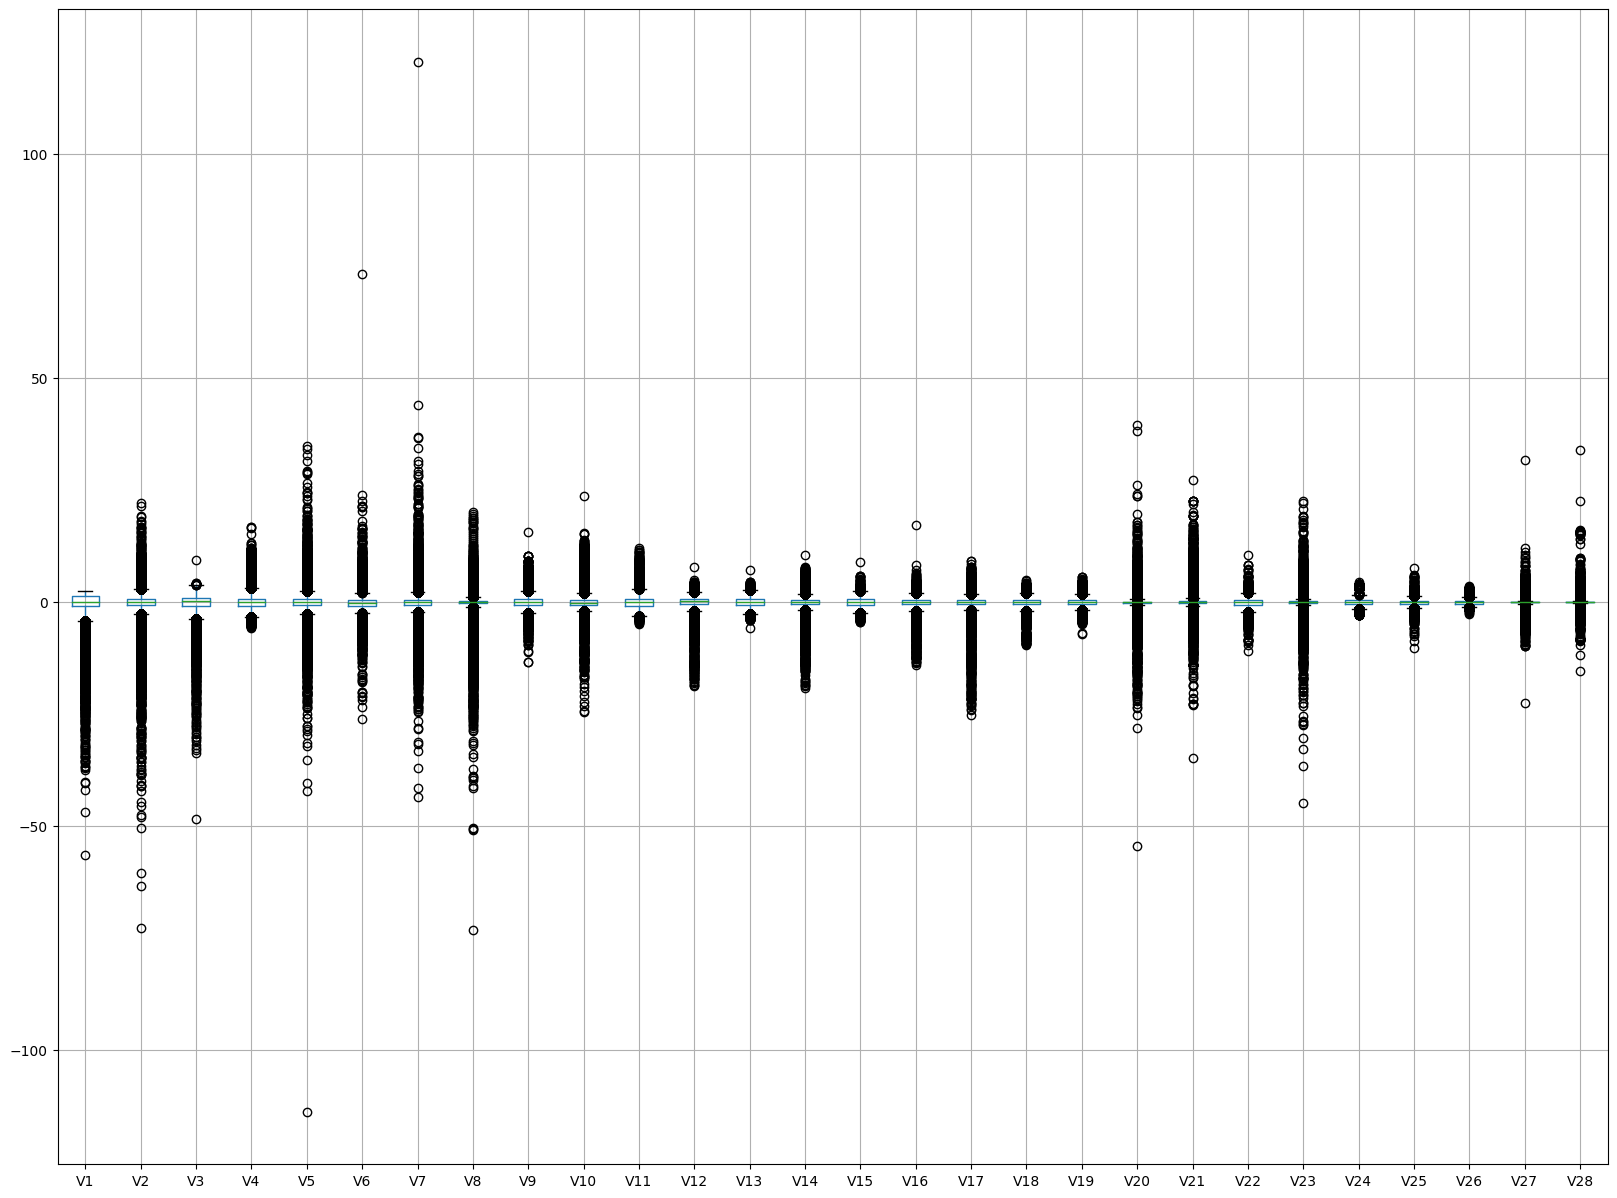

In [6]:
data.boxplot(column = features , figsize = (20,15))

- In the box-plot the boxes represent the Inter Quartile Range ( 25% to 75%). As we see above the boxes are very small showing the PCA features the data is very much centered around the mean. Also we see a lot of individaual points which go well above and below showing that the range is quite spread. 

In [9]:
# Get numbers of non-frauds
frauds_no = data['Class'].value_counts()[0]
print('Non-fraud transactions in dataset: ', round(frauds_no/len(data) * 100,2) , '% (', frauds_no, ' cases)')

# Get numbers of frauds
frauds_yes = data['Class'].value_counts()[1]
print('Fraud transactions in dataset: ', round(frauds_yes/len(data) * 100,2) , '% (', frauds_yes, ' cases)')

Non-fraud transactions in dataset:  99.83 % ( 283253  cases)
Fraud transactions in dataset:  0.17 % ( 473  cases)


From the statistics obtained above we can see that most of the data (283253) are normal transactions while only a few ones are related to fraudulent transactions (473). 
Since the fraudalant data is much less than the Normal data, the dataset is highly imbalances. This has implications for the ML algorithms which will tend to overfit the Normal transaction data and still have a high accuracy. Clearly that is not sufficient as we aim to be more accurate in recognizing the fraudaulant transactions. The error associated with missing a fraudulant transaction has much higher cost compared error associated with flagging a normal transaction as fraudulant. 

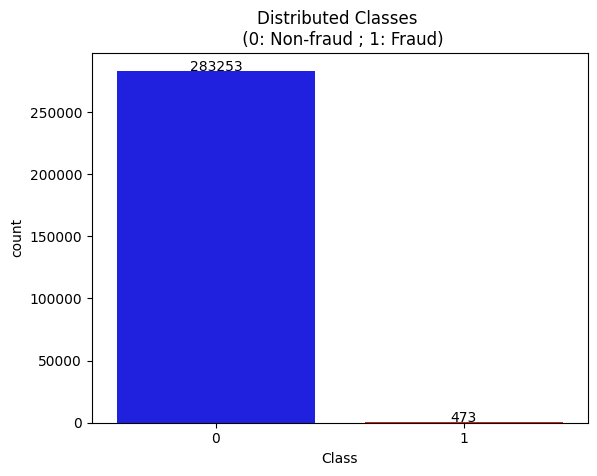

In [10]:
# Plot frauds and non-frauds class count
color_map = {0:'blue', 1:'red'}
graph = sns.countplot(x='Class', data=data,palette=color_map)

i = 0
for p in graph.patches:                                     
    height = p.get_height()                                 
    graph.text(p.get_x() + p.get_width()/2., height, data['Class'].value_counts()[i], ha="center")
    i += 1                                                   

# Plot Settings
plt.title('Distributed Classes \n (0: Non-fraud ; 1: Fraud)') 
plt.show()


The data can be visualized as the distribution of the transaction amount in the case of fraudulent (1) or Normal (0) classes. The results are shown in the next figure.

Text(0.5, 1.0, 'Amount Distribution for fraud and normal transactions \n (0: No fraud ; 1: Fraud)')

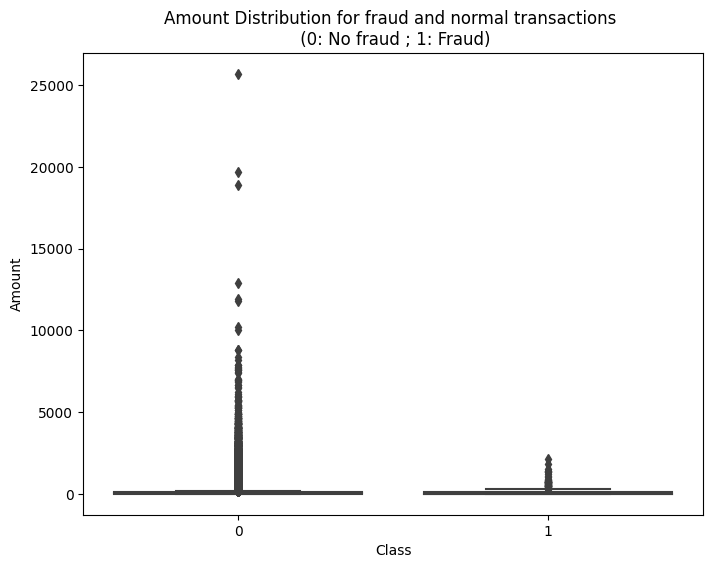

In [11]:
# DISTRIBUTION OF TRANSACTION AMOUNT FOR FRAUD/NON-FRAUD CLASSES

plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount',data = data)
plt.title('Amount Distribution for fraud and normal transactions \n (0: No fraud ; 1: Fraud)')

- From the box-plot above we can see that most of the fraudulant transactions are of smaller amounts. The likely cause can be stricter validation processes associated with the purchases for high value transactions. 


Text(0.5, 1.0, 'Normal transactions ')

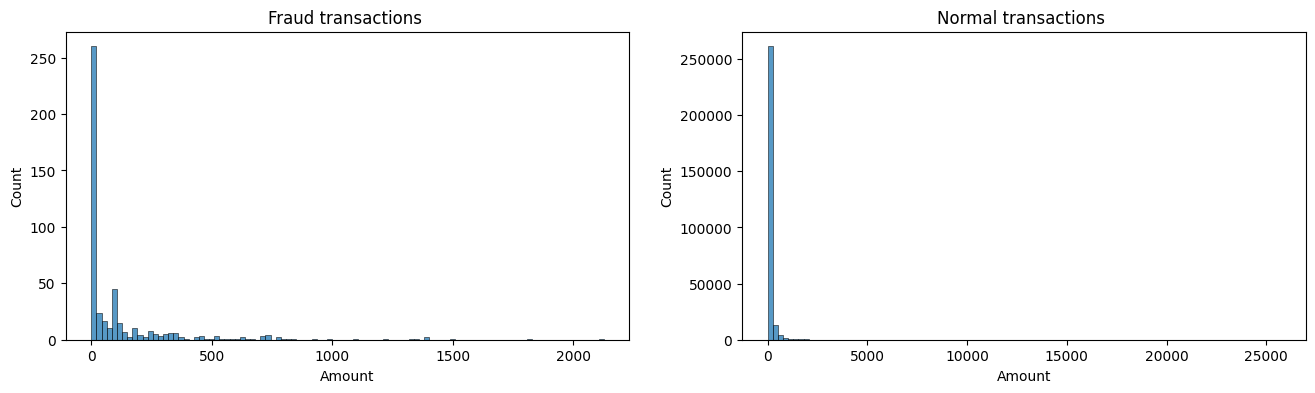

In [12]:

# distribution of fraud/ Non-fraud transaction plot
fig, axs = plt.subplots(ncols=2,figsize=(16,4))

sns.histplot(data= data[data['Class'] == 1]['Amount'], bins=100, ax=axs[0])
sns.histplot(data= data[data['Class'] == 0]['Amount'], bins=100, ax=axs[1])

#Plot settings
axs[0].set_title("Fraud transactions ")   
axs[1].set_title("Normal transactions ")   

- Show the distribution of fraud/ Non-fraud transaction for the Amount. We see that high value transactions are non-fraudulant. Also it is important to notice that the bulk of the normal transactions (>95%) are also low value which most probably belong to the day to day transactions. Among these the fraudulant transactions are hidden.  

In [12]:

#Define dataset for Normal transactions
NormalTrans = data[data['Class']==0]
fraudTrans = data[data['Class']==1]

#Max, Min
print("Maximum amounts for Normal transaction:",NormalTrans['Amount'].max(),", Minimum:", NormalTrans['Amount'].min())
#Max, Min
print("Maximum amounts for fraud transaction:",fraudTrans['Amount'].max(),", Minimum:", fraudTrans['Amount'].min())


Maximum amounts for Normal transaction: 25691.16 , Minimum: 0.0
Maximum amounts for fraud transaction: 2125.87 , Minimum: 0.0


The maximum fraudulent transactions has a value of about 2126, which is much lower than the maximum value for the non-fraud values as we have noticed above as well. The minimum value of 0.0 is also found which is usually used for credit card authorization by the merchant [1]. 

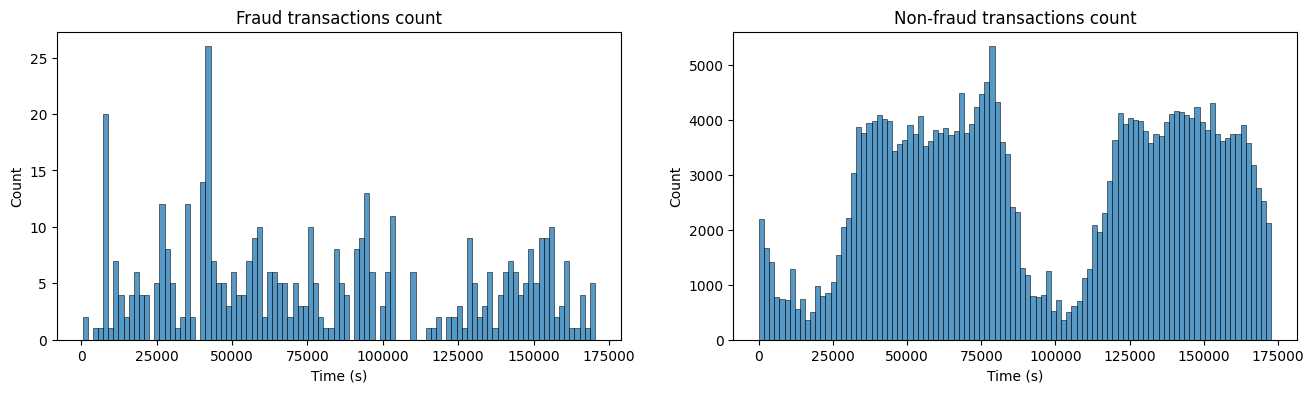

In [14]:
# Frauds and non-frauds over time
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.histplot(fraudTrans['Time'], bins=100, ax=axs[0])
sns.histplot(NormalTrans['Time'], bins=100, ax=axs[1])


axs[0].set_title("Fraud transactions count")      
axs[1].set_title("Non-fraud transactions count")  
axs[0].set_xlabel('Time (s)')
axs[1].set_xlabel('Time (s)')
plt.show()

- Next we try to explore if there are some associted with the timings of when the fradulant transactions are done. This is shown in the histogram above of the number of transactions carried within a time slot. As we can clearly see that the non-fraudulant transactions are mostly carried out in the daytime and low during nighttime. It is shown by the two crests in the plot. 
- However we cannot relate any particular timestamp that corresponds to the fradulant transactions. The correlation of fraudulant transaction with night or daytime is rather weak.

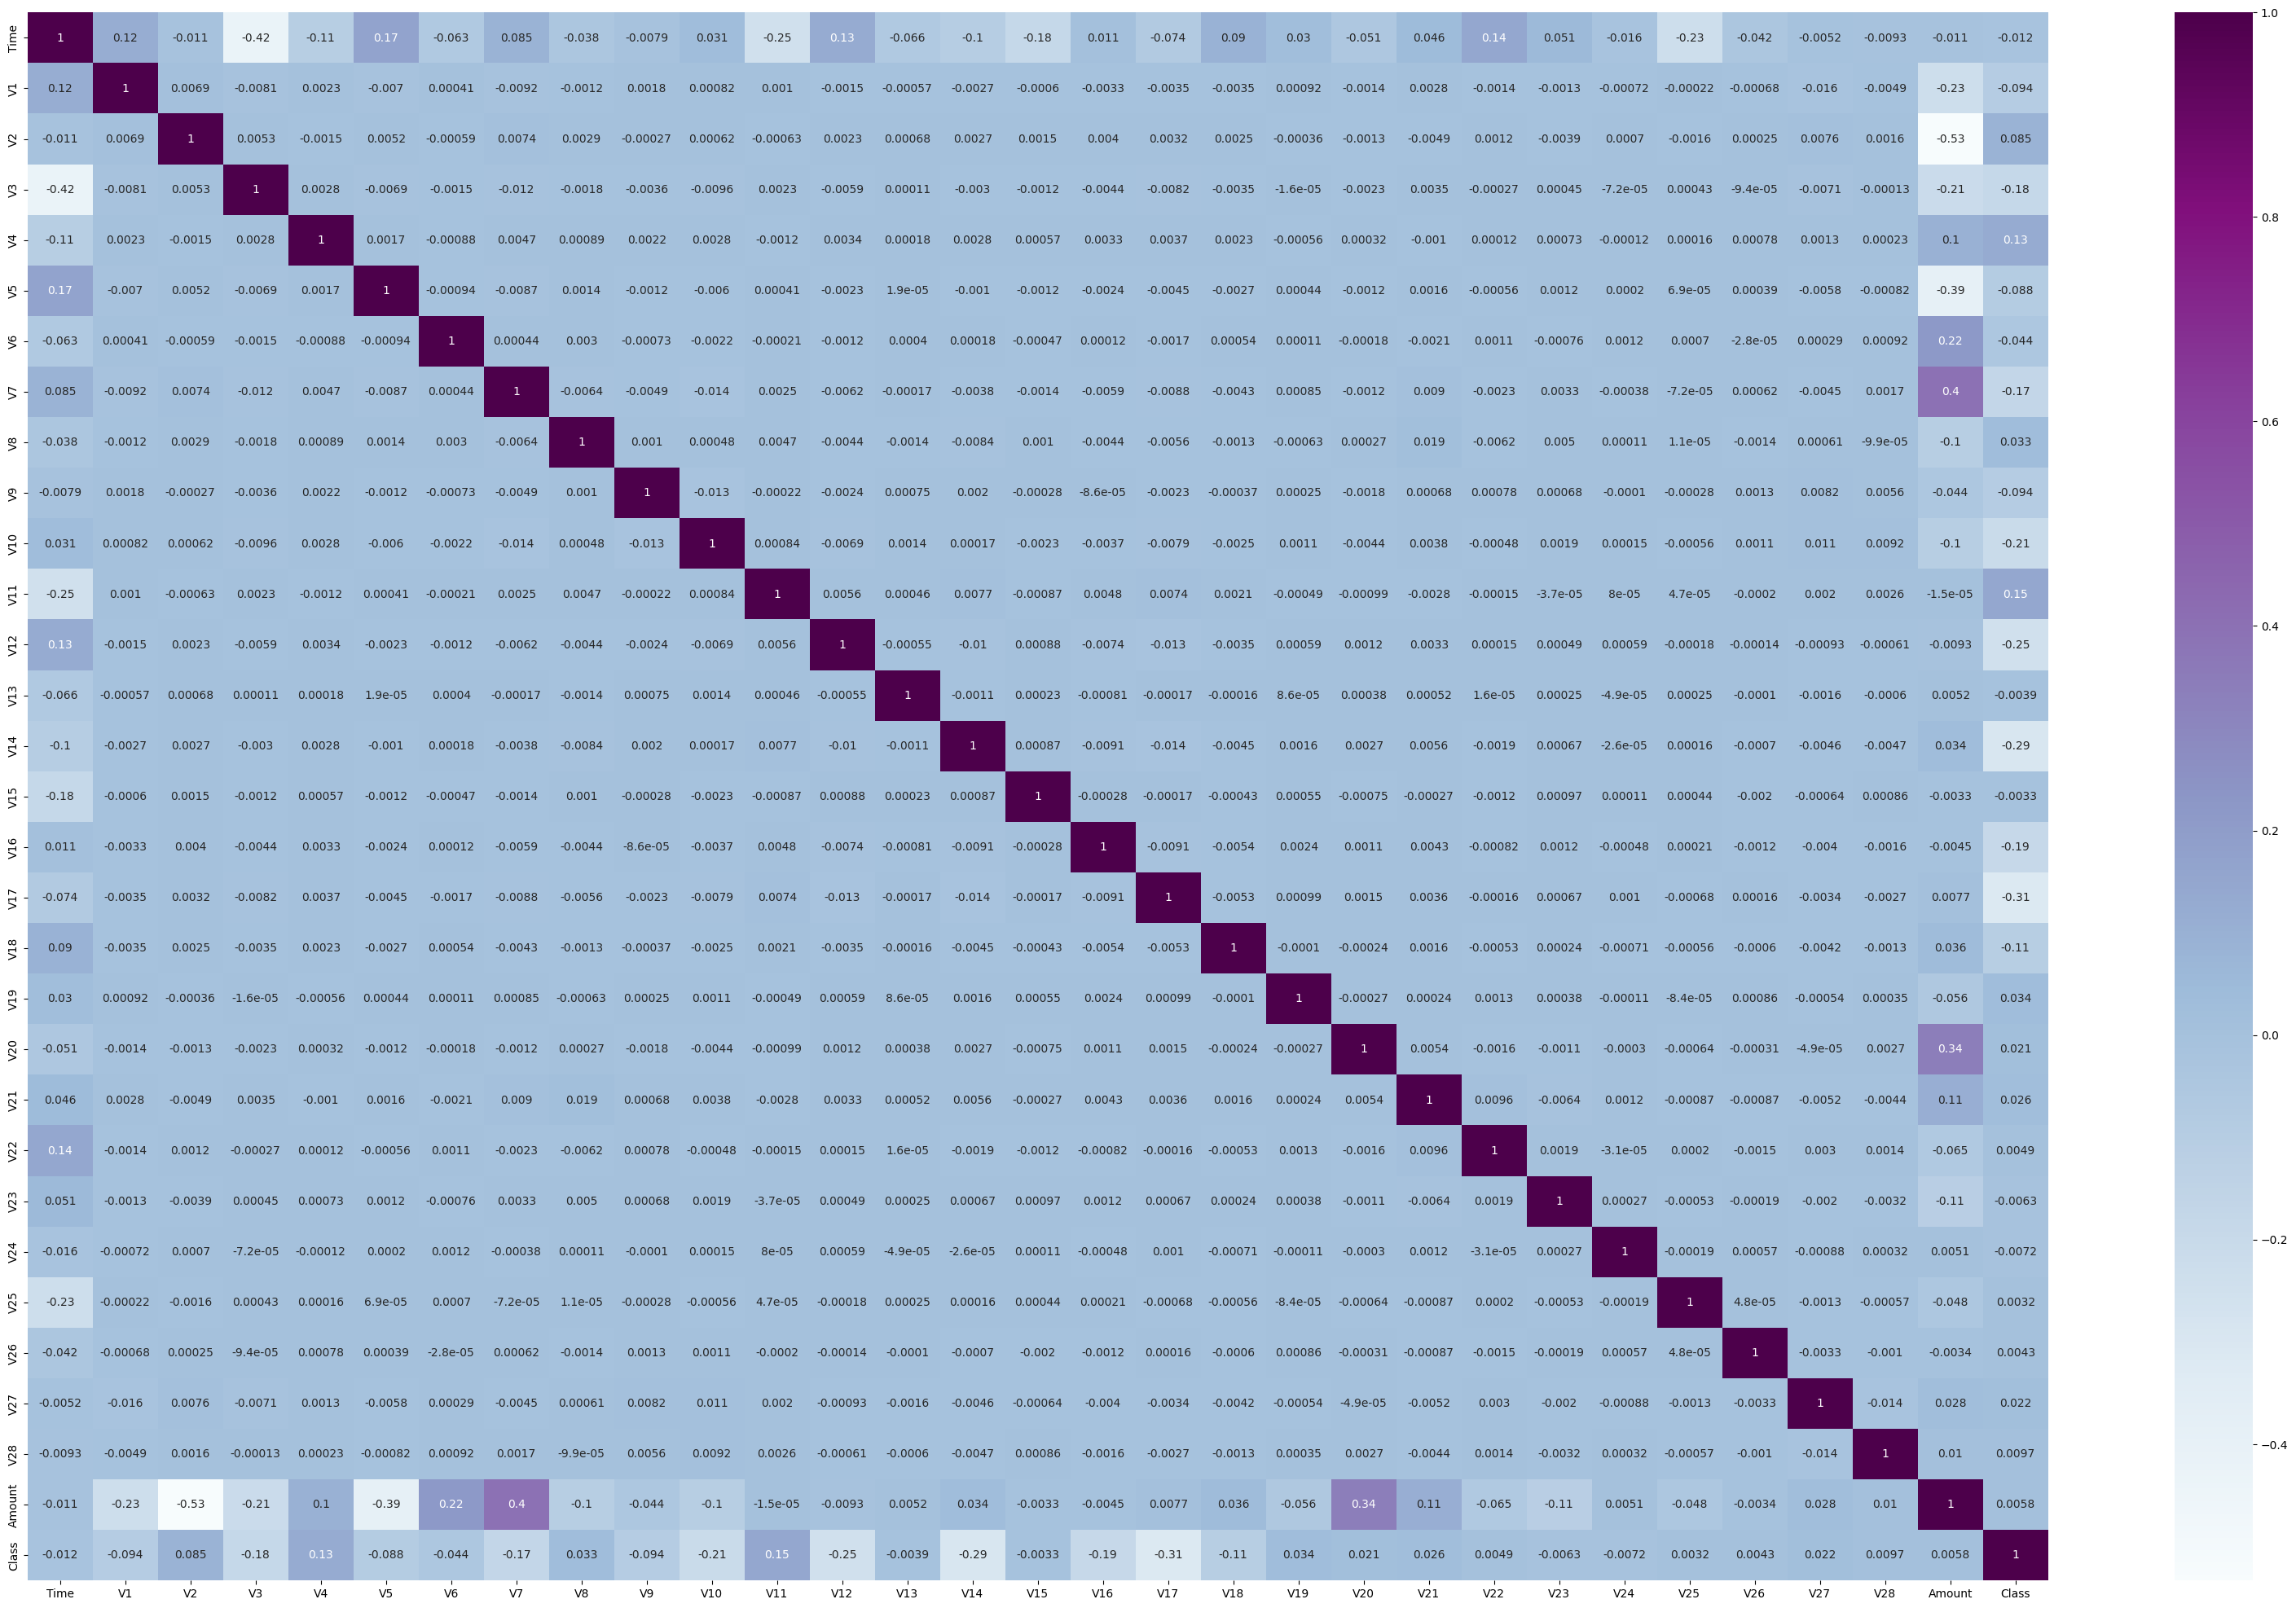

In [16]:
# Correlation matrix
plt.figure(figsize = (40,25))
sns.heatmap(data.corr(), annot = True, cmap = 'BuPu')
plt.show()

- PCA transformation leads to orthogonally principal axis which are supposed to be uncorrelated to each other. The correlation matrix betweeen the features is checked. If we look closely we see that except the diagonals all the values are very low which verifies that all the principal components are uncorrelated. This low correlation among features is due to the heavy umbalanced dataset, we can see another correlation matrix is presented after resampling the data later.

# Multi Dimensional Visualization using (T-SNE)
Another visualization is the t-SNE (T-distributed Stochastic Neighbor Embedding) scatter plot. t-SNE is a non-linear stochastic technique which is used to visualize higher-dimensional data in lower dimension. It uses t-distribution to replicate the joint probability in higher dimension to lower dimension. 
It is an iterative algorithm and uses the following steps
- Finding neighbors in the multi-dimensional space and calculate the joint probability
- Create low dimension dataset starting with a random allocation of points and gradually moving the points to replicate the joint distribution in the lower dimensional space.
- Optimize the mismatch of probability between higher and lower dimensions moving the points.
- It should be always considered that the plot has associated errors not an exact representation of multi-dimensional data. However it is very useful to have a qualitative glimpse of the dataset structure.

In [17]:
# t-SNE SCATTER PLOT OF ORIGINAL DATASET

# Import libraries
from sklearn.manifold      import TSNE
from sklearn.preprocessing import StandardScaler


def T_SNE_plot(Normal, fraud, sampleCount):
   #Add-on of 10000 legit transactions
   
   sampleDf = pd.concat([fraud, Normal.sample(n = sampleCount)], axis = 0)

   #Define scaler function
   standard_scaler = StandardScaler()

   #Removing mean and scaling to unit variance (better tsne fit)
   sampleDf_std = standard_scaler.fit_transform(sampleDf)

   #Set y equal to the target (CLASS) values.
   y = sampleDf.iloc[:,-1].values

   #Generate t-SNE model
      #n_components: dimensions of t-SNE space
   tsne = TSNE(n_components = 2, random_state = 0)

   #Generate tsne data
   x_test_2d = tsne.fit_transform(sampleDf_std)

   #t-SNE plot
   color_map = {0:'blue', 1:'red'}
   plt.figure()
   for i, j in enumerate(np.unique(y)):
      plt.scatter(x = x_test_2d[y == j, 0], 
                  y = x_test_2d[y == j, 1], 
                  c = color_map[i], 
                  label = j)

   #Plot settings
   plt.xlabel('X')                             
   plt.ylabel('Y')                              
   plt.legend(loc='upper left')                
   plt.title('t-SNE PLOT for data)')     
   plt.show()

# Create New  separated Data frame for Normal transaction & Fraud Transaction
NormalTrans = data[data['Class']==0]
fraudTrans = data[data['Class']==1]

c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


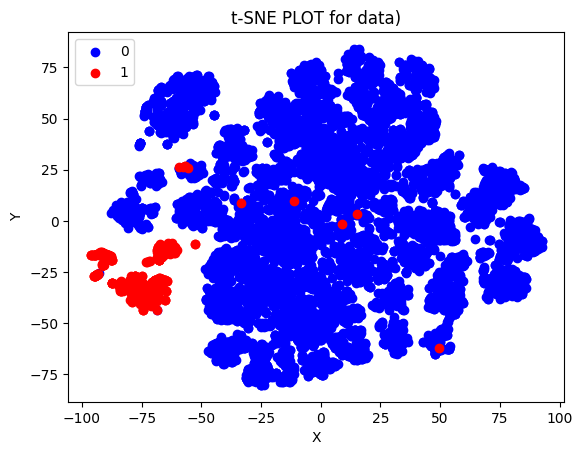

In [18]:

# Plot T_SNE
T_SNE_plot(NormalTrans, fraudTrans, 10000)

- From the T-SNE plot we see that the credit card data seems quite distinctly separated in the multi-dimensional space. We can also see some fraud transactions very similat to the normal transactions.  For this plot we have chosen all the fraud transactions while a sampling is done from the normal transactions.  
- We will try to do under-sampling from the Normal transaction data to plot Heatmap & the T-SNE for a balanced data



- we try to do under-sampling the data to plot Heatmap & the T-SNE for a balanced data

Distribution of the Classes in the data_sample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


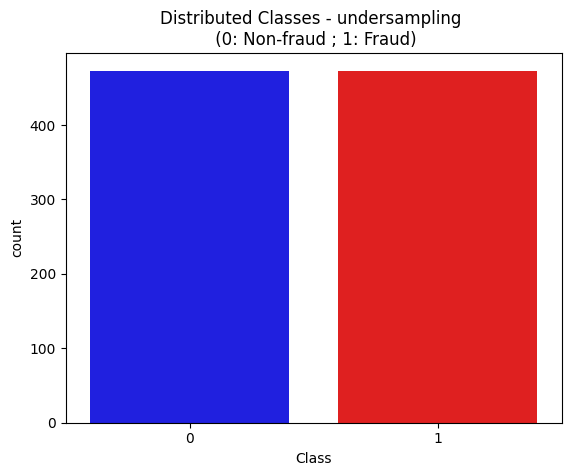

In [19]:

# Undersampling of the data by using Randomly undersampleing  for the majority set.
# frauds_yes = count of fraud transaction we calculated before.
FraudCount = fraudTrans.shape[0]
valid_sample = NormalTrans.sample(n = FraudCount)

#Assemble new dataframe 
data_sample = pd.concat([valid_sample,fraudTrans], axis = 0)

#Class values counting
print('Distribution of the Classes in the data_sample dataset')
print(data_sample['Class'].value_counts()/len(data_sample))


color_map = {0:'blue', 1:'red'}
sns.countplot(x= 'Class', data=data_sample, palette=color_map)
plt.title('Distributed Classes - undersampling \n (0: Non-fraud ; 1: Fraud)') 
plt.show()

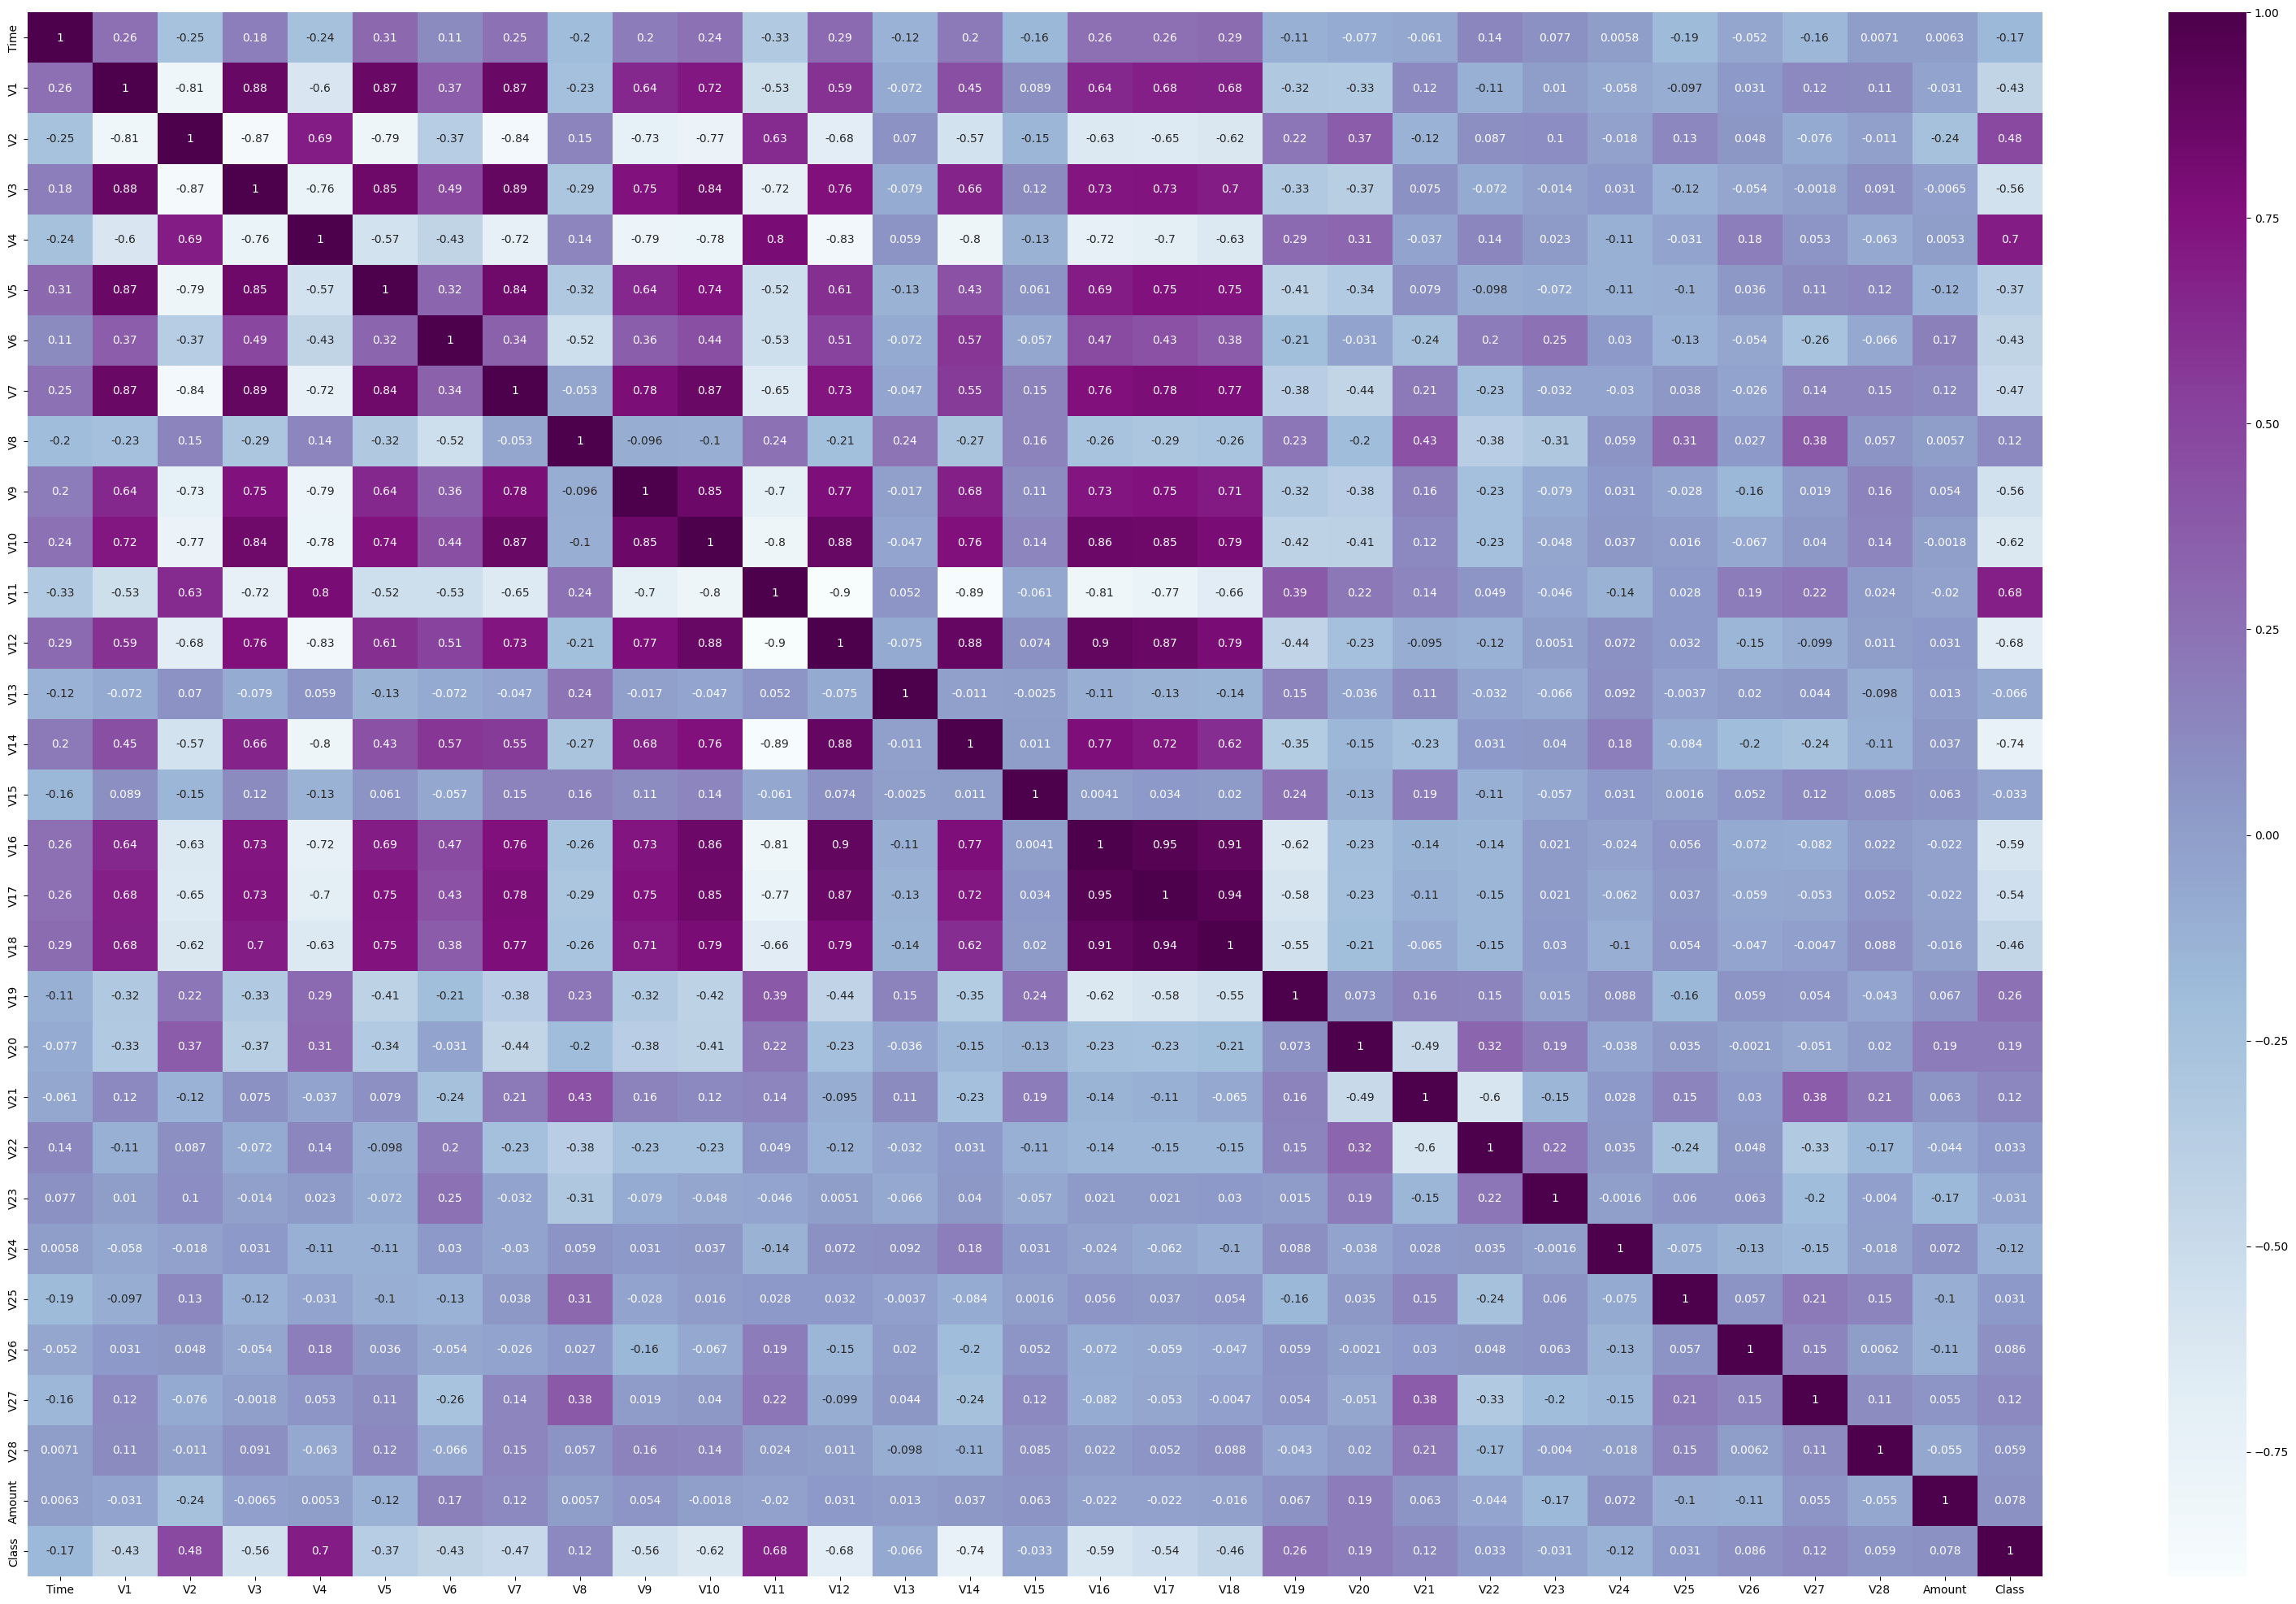

In [20]:
# Correlation matrix
plt.figure(figsize = (40,25))
sns.heatmap(data_sample.corr(), annot = True, cmap = 'BuPu')
plt.show()

It is clear that the balanced dataset has a higher correlation than that associated with the original imbalanced dataset. This matrix is useful to detect correlation-collinearity between dataset variables and target variables. For instance, variable V2, v4, v11are positively correlated.


c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


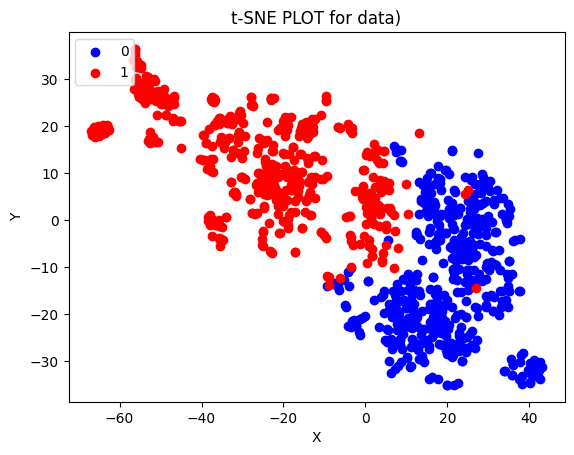

In [21]:
# Plot the TSNE after undersampling process
T_SNE_plot(valid_sample, fraudTrans, FraudCount)

- In the above T-SNE plot we have equal number of samples from the fraudulant and non-fraudulant transactions. Here also we observe the a distinct separation between the fraudulant and non-fraudulant transactions

- The mean and standard deviation values of each column can be evaluated for both the original dataset and the undersampled dataset, as follows.

In [22]:
# COMPARE MEAN VALUES OF EACH COLUMN BETWEEN Normal AND FRAUD transaction
#Before sampling
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [23]:
# (UNDERSAMPLING) COMPARE MEAN VALUES OF EACH COLUMN BETWEEN VALID AND FRAUD DATASETS
# After undersampling
data_sample.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96735.150106,0.062941,0.079065,-0.020484,0.011468,0.045709,0.024760,0.091360,0.013331,0.045988,...,0.011381,-0.028728,0.022088,-0.027264,0.028633,-0.000381,-0.028926,-0.023275,0.024911,86.061776
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


- From the mean value calculation of each feature we see that the mean values for the fraudulat transactions are much higher than the normal transactions. 
- Since all the fraudulant data is taken its mean are same but the mean of the normal transaction data vary.


### 3. Baseline: Apply Machine learning models and evalulation through Cross validation

- At the baseline we will Apply machine learning classifier for the imbalanced dataset before sampling. and check the results.
- We will use Cross_val_score function to do train/test split on the base line.
Cross_val_score  is a function in the scikit-learn package which trains and tests a model over multiple folds of the dataset. 
When performing a K-FOLD Cross Validation, the following steps are taken:
- K-1 of the folds is used as training data to train the model.
- The remaining data are used to validate the resulting model.
The performance metric which we chosse (roc_auc) is computed at each step while this process is performed K times.
This cross validation method gives a better understanding of model performance over the whole dataset instead of just a single train/test split.

https://stephenallwright.com/cross_val_score-sklearn/

In [24]:
# Importing the library

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import  svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve, auc, make_scorer
from sklearn.preprocessing import StandardScaler


Baseline Preprocessing:
- First the dataset is prepared. The 'Class' column is dropped from the original dataframe and save it in X part and the Y part contains only the class column.
- Further the 'Amount' and 'Time' data is transformed to a (-1,1) range and added to the dataframe using Scaler transform  function as these feature vary a lot. 
- Once the transformed variables are added the old columns 'Amount' and 'Time is dropped from the dataframe.

In [25]:
# X: All features except class
# y  : Class
X = data.drop(columns='Class', axis = 1)
y   = data['Class']
#Apply scaling on the training data & Add new columns to the train Data (scaledAmount & ScaledTime)
scaler = StandardScaler()

X['ScAmount'] = scaler.fit_transform(X['Amount'].values.reshape(-1,1))
X['ScTime'] = scaler.fit_transform(X['Time'].values.reshape(-1,1))


# Then we drop Time & Amount columns after scaling from the data
X.drop(['Time','Amount'], axis=1, inplace = True)



- Apply cross_val _score for three Machine learning classifiers (LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier).
- We used 5 folds which reapeated 3 times and the roc_auc as a scoring metric 

In [26]:

# X = Features, y = Target
cv_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=seed_num)

model = LogisticRegression( random_state=seed_num)
LR_scores = cross_val_score(model, X = X, y = y, cv=cv_kfold, scoring='roc_auc')

model = DecisionTreeClassifier( random_state=seed_num)
DT_scores = cross_val_score(model, X = X, y = y, cv=cv_kfold, scoring='roc_auc')

model = KNeighborsClassifier()
Knn_scores = cross_val_score(model, X = X, y = y, cv=cv_kfold, scoring='roc_auc')

In [27]:
# Storing scoring values for each ML Models
Model_scores = pd.DataFrame({
    'Model': ["LR", "DT", "KNN"],
    'Roc_auc': [LR_scores.mean(), DT_scores.mean(), Knn_scores.mean()]})

print('MODEL COMPARISON for BaseLine Models ')
Model_scores.sort_values(by='Roc_auc', ascending=False)

#print("Mean roc_auc score of LogisticRegression %0.2f with a standard deviation of %0.2f" % (LR_scores.mean(), LR_scores.std()))

MODEL COMPARISON for BaseLine Models 


,Model,Roc_auc
0,LR,0.973641
2,KNN,0.919205
1,DT,0.878580


- The result above shows that the Logistic Regression performs the best while Decision Tree is the worst.

###  4. Splitting the dataset & scaling the splitting data
- We will try to improve the results in the base line and process other methods for Imbalaced data.
- Split the Dataset into X: features, y:class sets.
- As we know from Kaggle that all the features in the dataset are scaled with PCA transformation except the time and amount.
- To do scaling we must first split the data into Training and Testing sets.
- We split the data with a 85:15 ratio thats mean 85% for training set and 15% of the dataset for testing set.
- Start scaling the time and amount column for each set.

In [28]:
#### Splitting the dataset & scaling
# Split the Dataset into training, Validating and testing sets and apply scaling for amount and time  columns
from sklearn.model_selection import train_test_split


# Features: All features except class
# Target  : Class
Features = data.drop(columns='Class', axis = 1)
Target   = data['Class']

# Split the data before scaling time and amount
X_train, X_test, y_train, y_test = train_test_split(Features, Target, train_size=0.85, stratify=Target, random_state = seed_num)

#Apply scaling on the training data & Add new columns to the train Data (scaledAmount & ScaledTime)
scaler = StandardScaler()

X_train['ScAmount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train['ScTime'] = scaler.fit_transform(X_train['Time'].values.reshape(-1,1))


#Apply scaling on the testing data & Add new columns to the test Data (scaledAmount & ScaledTime)
X_test['ScAmount'] = scaler.fit_transform(X_test['Amount'].values.reshape(-1,1))
X_test['ScTime'] = scaler.fit_transform(X_test['Time'].values.reshape(-1,1))


# Then we drop Time & Amount columns after scaling from the data
X_train.drop(['Time','Amount'], axis=1, inplace = True)
X_test.drop(['Time','Amount'], axis=1, inplace = True)

print('After splitting the Dataset we get:\n', 'Train.Shape', X_train.shape,', test.shape:',y_test.shape)

After splitting the Dataset we get:
 Train.Shape (241167, 30) , test.shape: (42559,)


- The data are now split between features and target with 85% of data being used for training.
- Target column is 'Class'. The features are V1..V28 and scaled 'Time' and 'Amount. The scaling is done for both training and test data sets.

- Display the Classes(0: NonFraud, 1: fraud) counts in both Training Dataset and Testing Dataset

In [29]:
print('classes count in the Training & Testing data:' )
print('='*100)
print("Training Set:\n", y_train.value_counts())
print('='*100)
print("Testing Set:\n", y_test.value_counts())

classes count in the Training & Testing data:
Training Set:
 0    240765
1       402
Name: Class, dtype: int64
Testing Set:
 0    42488
1       71
Name: Class, dtype: int64


### 5. Build a Neural Network, fitting the data and evalution before sampling

-  Build a shallow Neural Network which consists of an input layer, dense layer with (32 units activation value = Relu) 
- The output layer with one unit (0 or 1) for binary classifier and we will used sigmoid as activation function.
- Test the Neural network on the Dataset before sampling first and after sampling at the end.
- Use Adam for optimization and Binary_crossentropy for loss function and use three metrices (accuracy, precision, recall)

In [32]:
import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras import metrics

In [33]:
def BuildNeuralNetwork(inputSize):

    NN_model = Sequential([
    Dense(inputSize, input_shape=(inputSize, ), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid') 
    ])


    NN_model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])
    NN_model.summary()
    return NN_model


# plot Accurancy & loss vs epoch
def plotModel(data1, data2, xlabel, ylabel, Title):         
    fig = plt.figure(figsize=(6,3))
    axes = fig.add_axes([0,0,1,1])
  
    axes.plot(data1)                # exp: accuracy
    axes.plot(data2)               # exp: val_accuracy
    axes.set_title(Title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)    
    axes.legend(['train', 'val'], loc='upper left')
    plt.show()



def Fitting_Evaluation(N_Model, x_trainDB, y_trainDB, x_testDB, y_testDB):

    callbacks_list = [
        EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1),            
    ]

    history = N_Model.fit(x_trainDB, y_trainDB, validation_split=0.2, batch_size=64, epochs=20, callbacks=[callbacks_list],verbose=2)
    
    # list all data in history
    score = N_Model.evaluate(x_testDB, y_testDB)
    loss = score[0]
    accuracy = score[1]
    percision = score[2]
    recall = score[3]    
       
    return loss, accuracy, percision, recall, history 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,955
Trainable params: 1,955
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3015/3015 - 4s - loss: 0.0097 - accuracy: 0.9985 - precision: 0.5209 - recall: 0.6730 - val_loss: 0.0040 - val_accuracy: 0.9993 - val_precision: 0.9062 - val_recall: 0.6667 - 4s/epoch - 1ms/step
Epoch 2/20
3015/3015 - 3s - loss: 0.0030 - accuracy: 0.9994 - precision: 0.8435 - recall: 0.7873 - val_loss: 0.0034 - val_accuracy: 0.9993 - val_precision: 0.8986 - val_recall: 0.7126 - 3s/epoch - 1ms/step
Epoch 3/20
3015/3015 - 3s - loss: 0.0026 - accuracy: 0.9995 - precision: 0.8610 - recall: 0.8063 - val_loss: 0.0036 - val_accuracy: 0.9993 - val_precision: 0.8986 - val_recall: 0.7126 - 3s/epoch - 1ms/step
Epoch 4/20
3015/3015 - 3s - loss: 0.0023 - accuracy: 0.9994 - precision: 0.8611 - recall: 0.7873 - val_loss: 0.0033 - val_accuracy: 0.9994 - val_precision: 0.9000 - val_recall: 0.7241 - 3s/epoch - 1ms/step
Epoch 5/20
3015/3015 - 3s - loss: 0.0021 - accuracy: 0.9995 - precision: 0.8660 - recall: 0.8000 - val_loss: 0.0037 - val_accuracy: 0.9993 - val_precision: 0.9474 - val_recall: 0.6207 - 3

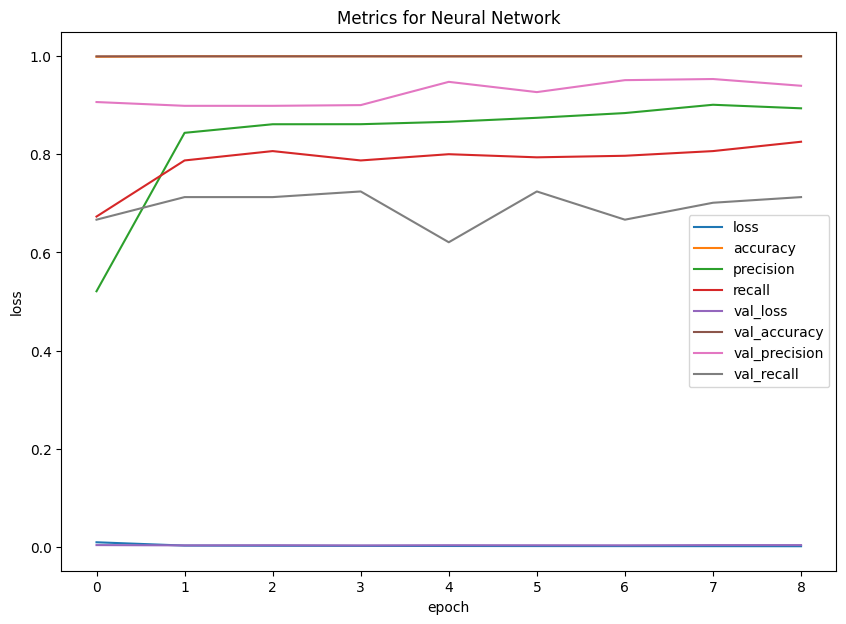

In [34]:
NN_model = BuildNeuralNetwork(X_train.shape[1])

Loss, accuracy, percision, recall, history = Fitting_Evaluation(NN_model, X_train, y_train, X_test, y_test)

# plot all the Metrces in the Neural Network
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Metrics for Neural Network')
plt.show()


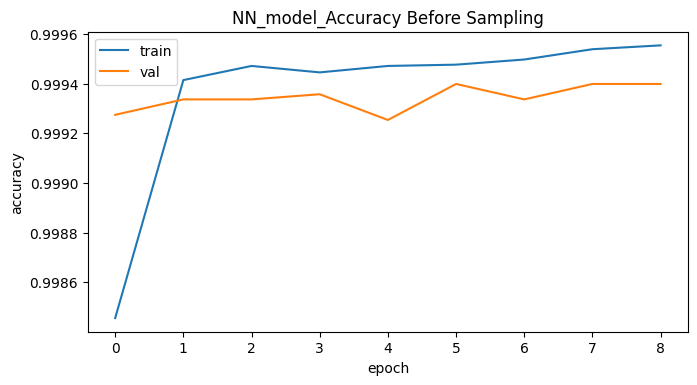

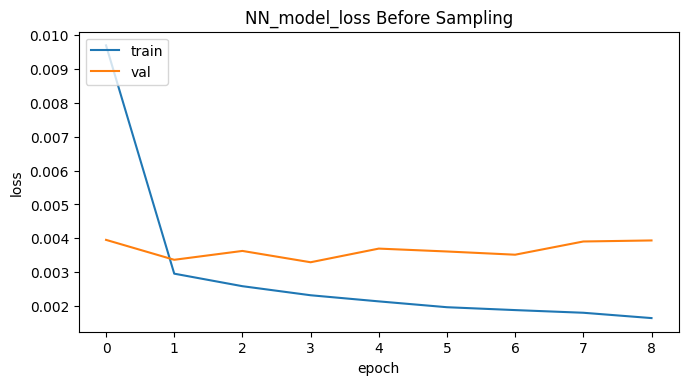

In [35]:

plotModel(history.history['accuracy'], history.history['val_accuracy'], 'epoch', 'accuracy','NN_model_Accuracy Before Sampling')
plotModel(history.history['loss'], history.history['val_loss'], 'epoch', 'loss','NN_model_loss Before Sampling')

- At the plot for the Accuracy Curve we can noticed that the training accuracy increasing and training stopped after 8 epochs, the loss curve shows that the validation loss started to decrease but the Training loss is quite good. The data before sampling tend to overfitting.


### 6. Handling Imbalanced dataset by (undersampling & oversampling)

- Our dataset is imbalanced. An imbalanced Dataset contains two classes one for the minority classes which is fraud transaction:1, and one classes with the majority classes which is normal transaction:0.
- There are many techniques for handling imbalanced Dataset under sampling and oversampling we used two techniques for under sampling (Random_under_sampling, Near Miss) and two techniques for oversampling (SVMSMOTE, SMOTE used with Over-under sampling method)
- Random under sampling: This method removes examples from the training dataset that belong to the majority class in order to better balance the class distribution.
- Near Miss Under sampling: This method selects examples based on the distance of majority class examples to minority class examples. We use NearMiss-1 which selects examples from the majority class that have the smallest average distance to the three closest examples from the minority class.
- SVMSMOTE: this method for over sampling uses an SVM classifier to find support vectors and generate samples considering them.
- SMOTE: Synthetic Minority Over-sampling Technique. SMOTE creates synthetic samples (no duplicates) of the minority class. This makes the number in the minority class to that of the majority class equal. It does this by selecting similar records and changing this record column by column by a random amount within the difference from the neighbouring records. we used both SMOTE with Random_undersampling in one method.
  - We defined a function to apply all techniques for (undersampling, oversampling) and plotting the data before and after sampling.


In [36]:
# Import all the library we need for undersampling, oversampling
from imblearn.over_sampling import SMOTE, SVMSMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Create a function to deal with unbalanced dataset and return the data after sampling 
# This function manipulate imbalanced problem by applying undersampling methods or oversampling
# This function has some arguments (x: features column without class, y: class column, sample method) and return the data after sampling 
# ##################################
# 1- Create the object for undersampling (NearMiss, RandomUnderSampler), oversampling (SVMSMOTE), Over_undersampling
# 2- Fit_resample the object for the training data.
# 3- Return the data after sampling
# #################################
def Sampling_UnbalancedData(X, y, Sample):  
    print('Handling unbalanced data by: ', Sample)  
    print('-'*100)
    stratigy = {0: 10}
    if Sample =='NearMiss':
        # create the object with auto
        nmiss = NearMiss(version=3, n_neighbors=5)        
        X_resampled, y_resampled = nmiss.fit_resample(X, y)

    if Sample =='R_UnderSampling':  # simple undersampling          
        under_sampler = RandomUnderSampler()        
        X_resampled, y_resampled = under_sampler.fit_resample(X, y)

    # oversampling
    if Sample == 'SVMSMOTE':
        smt = SVMSMOTE(random_state=seed_num)
        #SMOTEENN
        X_resampled, y_resampled = smt.fit_resample(X, y)

    if Sample == 'Over_underSampling':
        over = SMOTE(sampling_strategy=0.1)
        under = RandomUnderSampler(sampling_strategy=0.5) 
        steps = [('over', over), ('under', under)]
        pipeline = Pipeline(steps=steps)
        X_resampled, y_resampled = pipeline.fit_resample(X, y)


    print('Apply ',Sample)  
    print('Before sampling Training Data , class count:\n', y.value_counts())
    print('-'*100)
    print('After sampling Training Data with,',Sample,'class count:\n', y_resampled.value_counts())        
    # return the trained data after sampling
    return X_resampled, y_resampled


In [37]:
# The code for plot a scatter plot for the data befor sampling and after sampling 
# we  took this code from the following link and did some updates 
# https://glemaitre.github.io/imbalanced-learn/auto_examples/combine/plot_smote_enn.html#sphx-glr-auto-examples-combine-plot-smote-enn-py

from sklearn.decomposition import PCA

def PlotDataAfterSampling(X, y, X_resampled, y_resampled, model):
   #print(__doc__)
   #X,y = X_train, y_train

   # Instanciate a PCA object for the sake of easy visualisation
   pca = PCA(n_components=2)
   # Fit and transform x to visualise inside a 2D feature space
   X_vis = pca.fit_transform(X)

   X_res_vis = pca.transform(X_resampled)

   # Two subplots, unpack the axes array immediately
   f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
   

   c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5, c= "green")
   c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5, c= "red")
   ax1.set_title('Original set')

   ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1], label="Class #0", alpha=0.5, c= "green")
   ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1], label="Class #1", alpha=0.5, c= "red")
   ax2.set_title(model)

   f.legend((c0, c1), ('Class #0', 'Class #1'), loc='lower center', ncol=2, labelspacing=0.)
  
   plt.tight_layout(pad=3)
   plt.show()
   

- Create functions to create Machine learning models, fitting and evaluate the model.
- Create function to print the accurcay and confusion matrix

### 7. Apply machine learning models after sampling: Fitting and utilization of Machine learning algorithms

In this section, we will Apply machine learning models on the data after resampling in the previous step.
- <b>Logistic regression</b> is effecient supervised ML algorithm. Its different to linear regression is that logistic regression will not require a linear relationship between variables both for inputs and output.

- <b>Random forests</b> is a supervised ML algorithm. It applied with  classification and regression. It has spesfic charechterstic of flexiblity and feasiblity to be used algorithm. A forest is comprised of trees. It has more trees, the reliable a forest is. Random forests generate decision trees on randomly chesen data samples, acquires prediction from each tree and dedcate the best solution with voting. 

- <b>Decision Tree algorithm</b> is  popular machine learning algorithms. It implement a tree like structure and their  combinations to detect a particular problemthere is a tree like structure in which each internal node represents a test on an attribute, each branch in tree reflects the benfit of this test, and each leaf node refers to the class label.

- <b>Support Vector Machine</b>  are data points that are nearest to the hyperplane and rank the position and orientation of the hyperplane. With this  these support vectors, we get the most out of the margin of the classifier. Removing the support vectors that will alter the place of the hyperplane. These are the most important aspects that assis us in configuring our SVM.

- <b>KNN is K-Nearest Neigbour</b> is machine learning algorithm has Memory-based with no explicit training or model, 
This Lgorthim make  the maximum proprties estimation of the classes posterior.This ML  is  applied as a baseline method it has diffrent extensions.

- <b>Gradient Boosting for classifer</b> It create an additive model in a forward stage-wise fashion; it permits for the reforming of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fitting with   the negative gradient of the loss functions. It has the faster variant of algorithm for intermediate datasets.

##### We created some functions like "ApplyMachineL_Model" & "MLModel_Evaluation" which will be performing the following steps:
<li>Create object of the machine learning model</li>
<li>Fit the machine learning model</li>
<li>Predict and evaluate the scores for (Accuracy, precision, Recall, F1-score)</li>
<li>Show confusion matrix and plot heatmap</li>

In [38]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import  svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve, auc, make_scorer

#===============================
# ApplyMachineL_Model Function
#===============================
# This function apply machinelearning algoithm.
# It takes 6 arguments Training data, Testing Data, Model Name, 
# some argument to show or print some values like(accuracy scoring, confusion matrix)
# Arguments:
# X : dataset-features all columns except class column
# y : dataset-class column
# model name: Machine learning.
#===============================
def ApplyML_Model( X_train, y_train, Model = 'LR', printResult = True, ConfusionMatrix= True):
   
    # Model Name
    ModelName = ''                

    # Apply Machine learning models     
    if Model == 'LR':        
        ModelName = 'LogisticRegression' 
        lr = LogisticRegression(random_state=seed_num,verbose = True)        
        lr.fit(X_train, y_train)
        y_predict = lr.predict(X_test)
        probs_model = lr.predict_proba(X_test)[:, 1]

    if Model == 'RF': 
        ModelName = 'RandomForestClassifier'
        
        rf = RandomForestClassifier(verbose = True)
        rf.fit(X_train, y_train)
        y_predict = rf.predict(X_test)
       # y_validation_predict = rf.predict(X_validation)
        probs_model = rf.predict_proba(X_test)[:, 1]
    if Model == 'DT':        
        ModelName = 'DecisionTree'
        
        dt = DecisionTreeClassifier()
        dt.fit(X_train, y_train)
        y_predict  = dt.predict(X_test)
       # y_validation_predict = dt.predict(X_validation)
        probs_model = dt.predict_proba(X_test)[:, 1]
        
    if Model == 'SVM':        
        ModelName = 'Support Vector Machine' 
        
        svmach = svm.SVC(C=0.1, kernel='linear', degree=3, gamma='auto',  probability=True,verbose=True)## c = 0.1,10, gamma = 0.1,0.01
        svmach.fit(X_train, y_train)
        y_predict = svmach.predict(X_test)
       # y_validation_predict = svmach.predict(X_validation)
        probs_model = svmach.predict_proba(X_test)[:, 1]
     
    if Model == 'KNN':
        ModelName = 'KNeighborsClassifier'
        knn = KNeighborsClassifier()
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
       # y_validation_predict = knn.predict(X_validation)
        probs_model = knn.predict_proba(X_test)[:, 1]

    if Model == 'GBT':
        ModelName = 'GradientBoostingClassifier'
        
        gbt = GradientBoostingClassifier()
        gbt.fit(X_train, y_train)
        y_predict = gbt.predict(X_test)
        #y_validation_predict = gbt.predict(X_validation)
        probs_model = gbt.predict_proba(X_test)[:, 1]        
        
    print('MachineLearning Model:',ModelName)
    print('='*100)
    return y_predict, probs_model

SampleName = ""

# Evaluation the ML models and print scores for(Accuracy, precision, Recall, F1-score)
# and print (classification report, confusionMatrix
def MLModel_Evaluation(y_predict, y_test, ModelName, ShowReport, ConfusionMatrix):
    
    # PERFORMANCE EVALUATION  and calculate model metrics            
    Test_Accuracy = accuracy_score(y_test, y_predict)
    Test_Recall_Score = recall_score(y_test, y_predict) 
    Test_precision_Score = precision_score(y_test, y_predict) 
    Test_f1_Score = f1_score(y_test, y_predict, average='weighted')  
    print('='*100)
    print("Accuracy: ", Test_Accuracy)   
    print("Precision_Score: ", Test_precision_Score)   
    print("Recall_Score: ", Test_Recall_Score)   
    print("F1_Score: ", Test_f1_Score)    
 
    if ShowReport == True: 
        print('\n Performance Report for model:',ModelName,'\n')       
        print(classification_report(y_test, y_predict))
    
    # CONFUSION MATRIX 
    if ConfusionMatrix == True:        
        conf_matrix = confusion_matrix(y_test, y_predict)
        
        print('='*100)
        print('CONFUSION MATRIX')
        print(conf_matrix)
         #Plot CONFUSION MATRIX
        categories = ['false', 'true']
        sns.heatmap(conf_matrix, annot=True, fmt = 'd', cmap = 'BuPu', xticklabels=categories, yticklabels=categories)
        plt.ylabel('True Value')
        plt.xlabel('Predicted value')   
        plt.title(ModelName + ' ML, Confusion Matrix for :'+ SampleName)     
    
    
    return Test_Accuracy, Test_precision_Score, Test_Recall_Score, Test_f1_Score

### 6.1 Handeling imbalanced dataset by applying random undersampling:
- Handel imbalanced data.
- Plot a scatter plot for the data before and after sampling.

##### Applying Random under sampling on the training data

Handling unbalanced data by:  R_UnderSampling
----------------------------------------------------------------------------------------------------
Apply  R_UnderSampling
Before sampling Training Data , class count:
 0    240765
1       402
Name: Class, dtype: int64
----------------------------------------------------------------------------------------------------
After sampling Training Data with, R_UnderSampling class count:
 0    402
1    402
Name: Class, dtype: int64


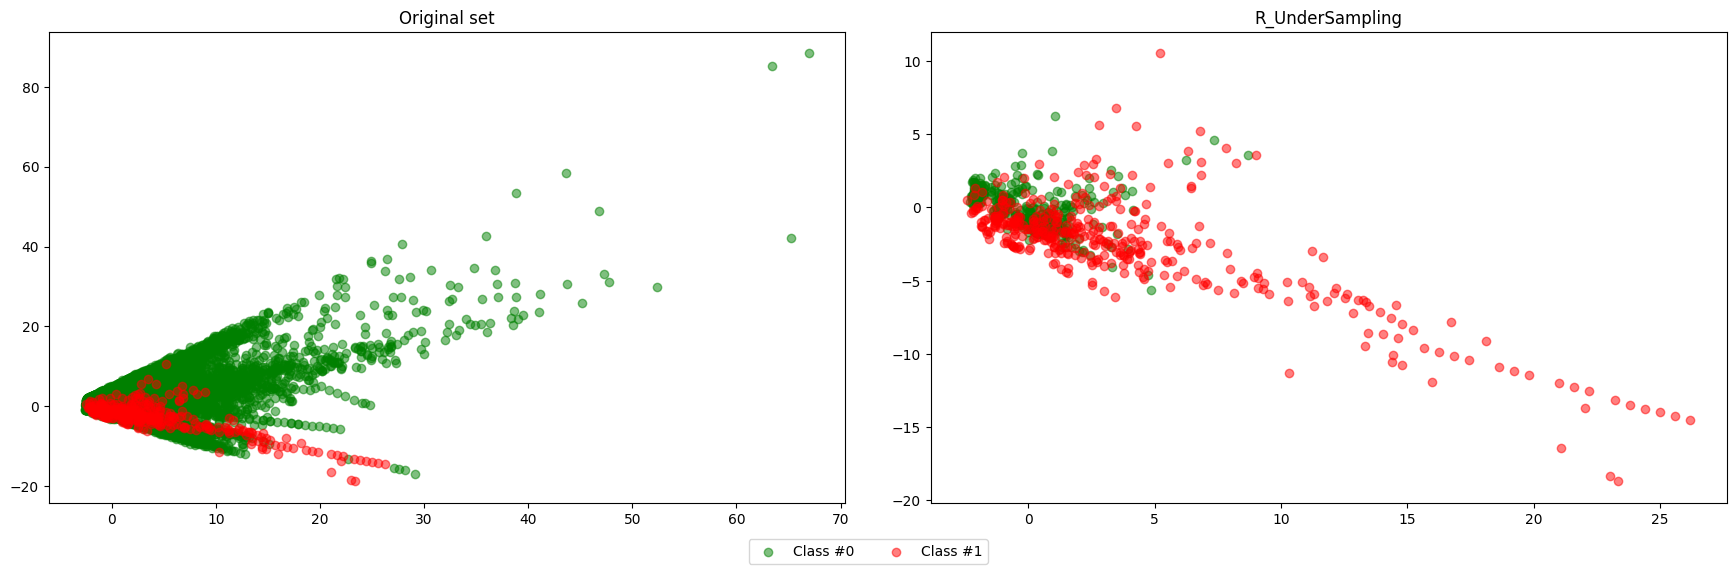

In [39]:
# 1. Handel imbalanced dataset by appling random undersampling method on the train dataset
# 2. plot the data before and after sampling
SampleName = 'R_UnderSampling'
X_SampleTrain, y_SampleTrain =  Sampling_UnbalancedData( X_train, y_train , SampleName)

PlotDataAfterSampling( X_train, y_train, X_SampleTrain, y_SampleTrain, SampleName)

- Applying machine learning Models over the training data after sampling

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


MachineLearning Model: LogisticRegression
Accuracy:  0.9747644446533048
Precision_Score:  0.055013309671694766
Recall_Score:  0.8732394366197183
F1_Score:  0.9857278512699645

 Performance Report for model: LogisticRegression 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     42488
           1       0.06      0.87      0.10        71

    accuracy                           0.97     42559
   macro avg       0.53      0.92      0.55     42559
weighted avg       1.00      0.97      0.99     42559

CONFUSION MATRIX
[[41423  1065]
 [    9    62]]


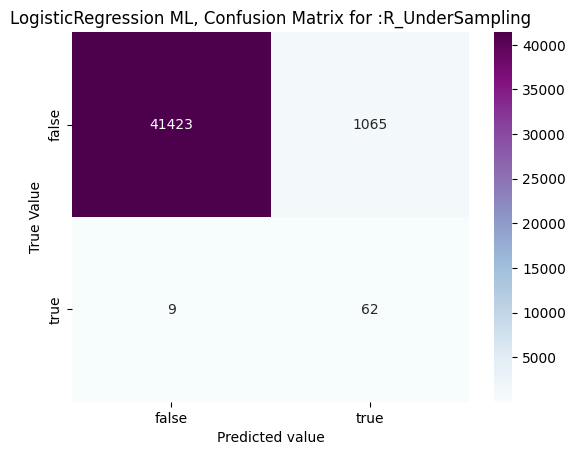

In [40]:
### LR:
# 1. Apply MachineLearning Model - Logistic Regression
Predict_LR, probs_LR = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'LR')

# 2. Evaluate the ML Model
Test_Accuracy_lr = MLModel_Evaluation(Predict_LR, y_test, ModelName='LogisticRegression', ShowReport = True, ConfusionMatrix=True)

The confusion matrix shows that , We have got a lower value for False negative which is a crictical parameter to detect the Fraud transactions and for evaluating the performance of our classification model. False Positive(Type 1 error) and False negative(Type 2 error) are less critical metrics in the confusion matrix.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MachineLearning Model: RandomForestClassifier
Accuracy:  0.9835287483258536
Precision_Score:  0.08222811671087533
Recall_Score:  0.8732394366197183
F1_Score:  0.9902801175428655

 Performance Report for model: RandomForest 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42488
           1       0.08      0.87      0.15        71

    accuracy                           0.98     42559
   macro avg       0.54      0.93      0.57     42559
weighted avg       1.00      0.98      0.99     42559

CONFUSION MATRIX
[[41796   692]
 [    9    62]]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


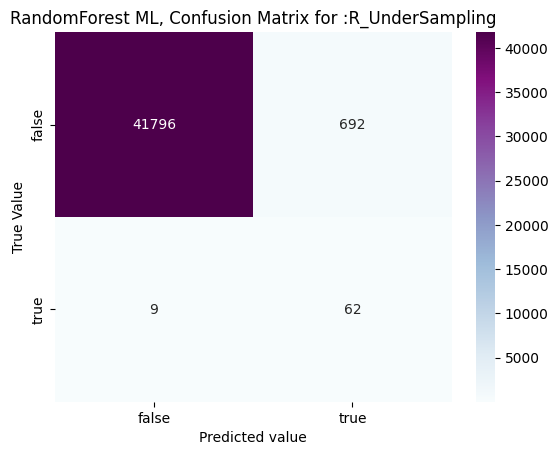

In [41]:
## RandomForest
# 1. Apply Machine Learning Model - RandomForest:
Predict_RF, probs_RF = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'RF')

# 2. Evaluatethe ML Model
Test_Accuracy_rf = MLModel_Evaluation(Predict_RF, y_test, ModelName='RandomForest', ShowReport = True, ConfusionMatrix=True)

The confusion matrix shows that we have high Accuracy, We can not rely on a single value of accuracy in classification when the classes are imbalanced. in our project False Negative (Recall score) is much more important. but F1-Score is used also when the False Negatives and False Positives are important for credit card detection. 
F1-Score is a better metric for Imbalanced Data.
We have got a lower value for False negative which is a crictical parameter to detect the Fraud transactions and for evaluating the performance of our classification model. we should have a trade of both False Positive(Type 1 error) and False Negative (Type 2 error).


MachineLearning Model: DecisionTree
Accuracy:  0.9042270730045349
Precision_Score:  0.015015742310486802
Recall_Score:  0.8732394366197183
F1_Score:  0.9480930341405589

 Performance Report for model: DecisionTree 

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     42488
           1       0.02      0.87      0.03        71

    accuracy                           0.90     42559
   macro avg       0.51      0.89      0.49     42559
weighted avg       1.00      0.90      0.95     42559

CONFUSION MATRIX
[[38421  4067]
 [    9    62]]


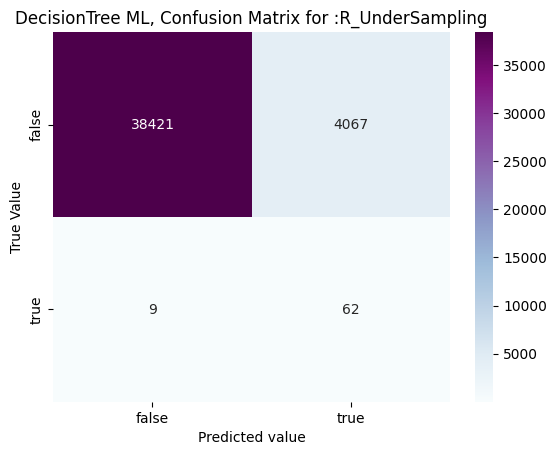

In [42]:
## DT

# 1. Apply MachineLearning Model - DecisionTree:
Predict_DT, probs_DT = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'DT')
# 2. Evaluation the ML Model
Test_Accuracy_dt = MLModel_Evaluation(Predict_DT, y_test, ModelName='DecisionTree', ShowReport = True, ConfusionMatrix=True)


[LibSVM]MachineLearning Model: Support Vector Machine
Accuracy:  0.980098216593435
Precision_Score:  0.06696428571428571
Recall_Score:  0.8450704225352113
F1_Score:  0.9884903038949976

 Performance Report for model: Support Vector Machine 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42488
           1       0.07      0.85      0.12        71

    accuracy                           0.98     42559
   macro avg       0.53      0.91      0.56     42559
weighted avg       1.00      0.98      0.99     42559

CONFUSION MATRIX
[[41652   836]
 [   11    60]]


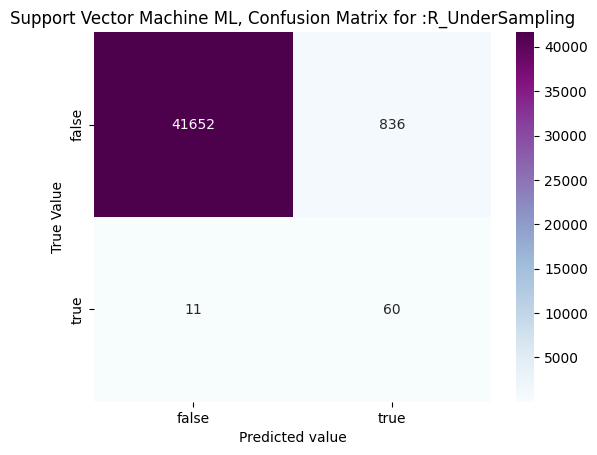

In [43]:
## SVM
# 2. Apply MachineLearning Model - SVM:
Predict_svmach, probs_SVM = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'SVM')
# 3. Evaluation the ML Model
Test_Accuracy_svmach = MLModel_Evaluation(Predict_svmach, y_test, ModelName='Support Vector Machine',  ShowReport = True, ConfusionMatrix=True)


MachineLearning Model: KNeighborsClassifier
Accuracy:  0.9805916492398787
Precision_Score:  0.06857142857142857
Recall_Score:  0.8450704225352113
F1_Score:  0.9887464794800809

 Performance Report for model: KNeighborsClassifier 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     42488
           1       0.07      0.85      0.13        71

    accuracy                           0.98     42559
   macro avg       0.53      0.91      0.56     42559
weighted avg       1.00      0.98      0.99     42559

CONFUSION MATRIX
[[41673   815]
 [   11    60]]


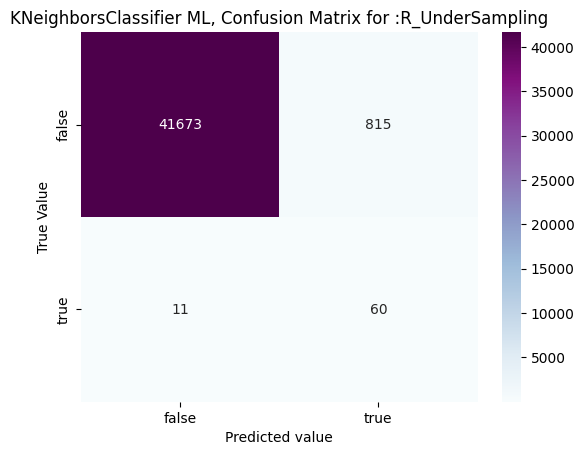

In [44]:
## KNN
# https://scikit-learn.org/stable/modules/neighbors.html#classification
# K Nearest Neighbors (KNN) algorithm uses calculation of similarity between samples in the data to implement voting-based prediction.
#"Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point."

# 1. Apply MachineLearning Model -KNeighborsClassifier :
Predict_KNN, probs_KNN = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'KNN')
# 2. Evaluation the ML Model
Test_Accuracy_knn = MLModel_Evaluation(Predict_KNN, y_test, ModelName='KNeighborsClassifier', ShowReport = True, ConfusionMatrix=True)

MachineLearning Model: GradientBoostingClassifier
Accuracy:  0.9721563006649593
Precision_Score:  0.04862236628849271
Recall_Score:  0.8450704225352113
F1_Score:  0.9843701010173833

 Performance Report for model: GradientBoostingClassifier 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     42488
           1       0.05      0.85      0.09        71

    accuracy                           0.97     42559
   macro avg       0.52      0.91      0.54     42559
weighted avg       1.00      0.97      0.98     42559

CONFUSION MATRIX
[[41314  1174]
 [   11    60]]


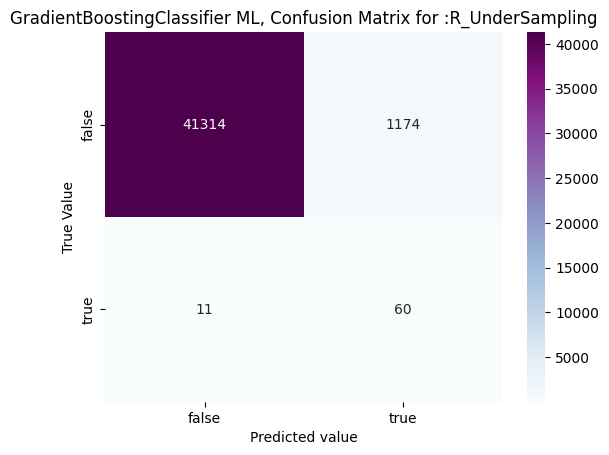

In [45]:
## Gradient Boosted Trees
"Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions, see the seminal work of [Friedman2001]. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology."
#More popular implementations of Gradient Boosted Trees are XGBoost, LightGBM, and CatBoost. They are frequently used in data science competitions held on Kaggle.

#1. https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting
#2. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# 1. Apply MachineLearning Model -KNeighborsClassifier :
Predict_GBT, probs_GBT = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'GBT')
# 2. Evaluation the ML Model
Test_Accuracy_gbt = MLModel_Evaluation(Predict_GBT, y_test, ModelName='GradientBoostingClassifier', ShowReport = True, ConfusionMatrix=True)

- ROC (Receiver Operating Characteristic) curves used  to evaluate different thresholds for classification machine learning problems. 
- ROC curve visualizes a confusion matrix for every threshold.

-https://towardsdatascience.com/roc-and-auc-how-to-evaluate-machine-learning-models-in-no-time-fb2304c83a7f

-To further analyze the methods performances, we plot the ROC curve and calculated Area Under Curve (AUC). The more AUC, the better the
classifier, as it could better distinguish between the classes.
-We can see from the figure that "------ML--" has by far the most AUC compare to other methods. 

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_lr = roc_auc_score(y_test, probs_LR)
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_LR)

auc_dt = roc_auc_score(y_test, probs_DT)
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_DT)

auc_rf = roc_auc_score(y_test, probs_RF)
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_RF)

auc_svm = roc_auc_score(y_test, probs_SVM)
fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_SVM)

auc_knn = roc_auc_score(y_test, probs_KNN)
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_KNN)

auc_gbt = roc_auc_score(y_test, probs_GBT)
fpr_gbt, tpr_gbt, _ = roc_curve(y_test,probs_GBT)

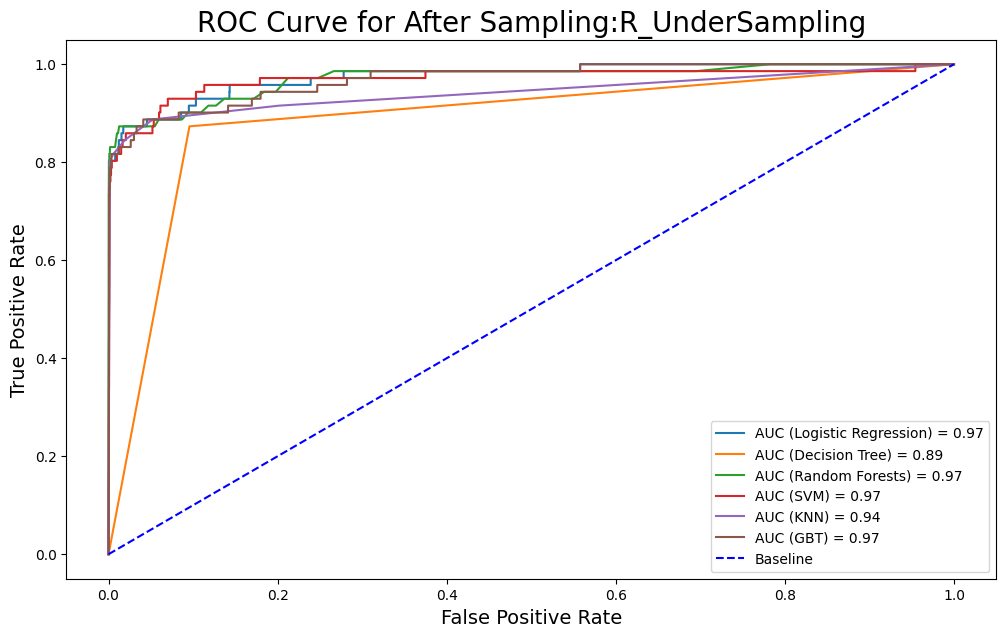

In [47]:
# plot AUC curve
plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'AUC (SVM) = {auc_svm:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {auc_knn:.2f}')
plt.plot(fpr_gbt, tpr_gbt, label=f'AUC (GBT) = {auc_gbt:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve for After Sampling:'+SampleName,  size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()



- When we compare the ROC curve for all machine learning models, we got fairly good score for almost all the models which we have used. 


### Evaluation & Comparision ML Models for Random undersampling

In [48]:
# Storing new accuracies for Random undersampling
#NMTest_Accuracy = [NMTest_accuracy_lr[0], NMTest_accuracy_SVM[0], NMTest_accuracy_rf[0], NMTest_accuracy_dt[0]]

RU_Table = pd.DataFrame({
    'Model': ["LR", "RF", "DT", "SVM", "KNN", "GBT"],
    'Accuracy_Score': [Test_Accuracy_lr[0], Test_Accuracy_rf[0], Test_Accuracy_dt[0], Test_Accuracy_svmach[0], Test_Accuracy_knn[0], Test_Accuracy_gbt[0]],
    'Precision_Score': [Test_Accuracy_lr[1], Test_Accuracy_rf[1], Test_Accuracy_dt[1], Test_Accuracy_svmach[1], Test_Accuracy_knn[1], Test_Accuracy_gbt[1]],
    'Recall_Score': [Test_Accuracy_lr[2], Test_Accuracy_rf[2], Test_Accuracy_dt[2], Test_Accuracy_svmach[2], Test_Accuracy_knn[2], Test_Accuracy_gbt[2]],
    'F1_Score': [Test_Accuracy_lr[3], Test_Accuracy_rf[3], Test_Accuracy_dt[3], Test_Accuracy_svmach[3], Test_Accuracy_knn[3], Test_Accuracy_gbt[3]]})

print('MODEL COMPARISON for *Random undersampling*')
RU_Table.sort_values(by='F1_Score', ascending=False)

MODEL COMPARISON for *Random undersampling*


,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
1,RF,0.983529,0.082228,0.873239,0.990280
4,KNN,0.980592,0.068571,0.845070,0.988746
3,SVM,0.980098,0.066964,0.845070,0.988490
0,LR,0.974764,0.055013,0.873239,0.985728
5,GBT,0.972156,0.048622,0.845070,0.984370
2,DT,0.904227,0.015016,0.873239,0.948093


From the Comparision table for undersampling, we notice is (KNN,RF and SVM) have the same accurcy and probably the  best one. Both LR, GBT  have the same accurcy result. Best recall-score for Random forest.

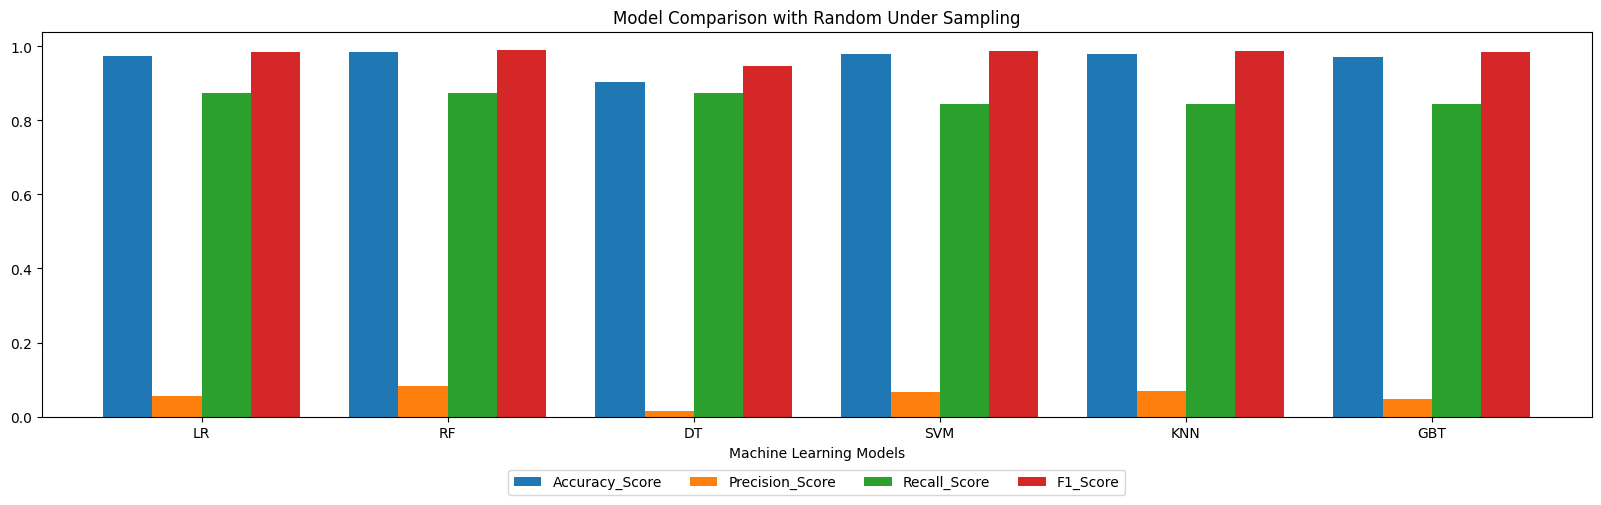

In [101]:
ax = RU_Table.plot.bar(rot=0,figsize=(20,5),width=.8,title= "Model Comparison with Random Under Sampling")
ax.set_xticklabels(RU_Table['Model'])
ax.set_xlabel('Machine Learning Models')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=False, ncol=4)

In random under sampling, we got the highest score for weighted F1-score . Also the recall score is quite good, but the precision score is  on the lower side . So we need to make the tradeoff between recall and precision to decrease both Type-1 and Type-2 error.

#### Applying Near miss Sampling

Handling unbalanced data by:  NearMiss
----------------------------------------------------------------------------------------------------


c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


Apply  NearMiss
Before sampling Training Data , class count:
 0    240765
1       402
Name: Class, dtype: int64
----------------------------------------------------------------------------------------------------
After sampling Training Data with, NearMiss class count:
 1    402
0    348
Name: Class, dtype: int64


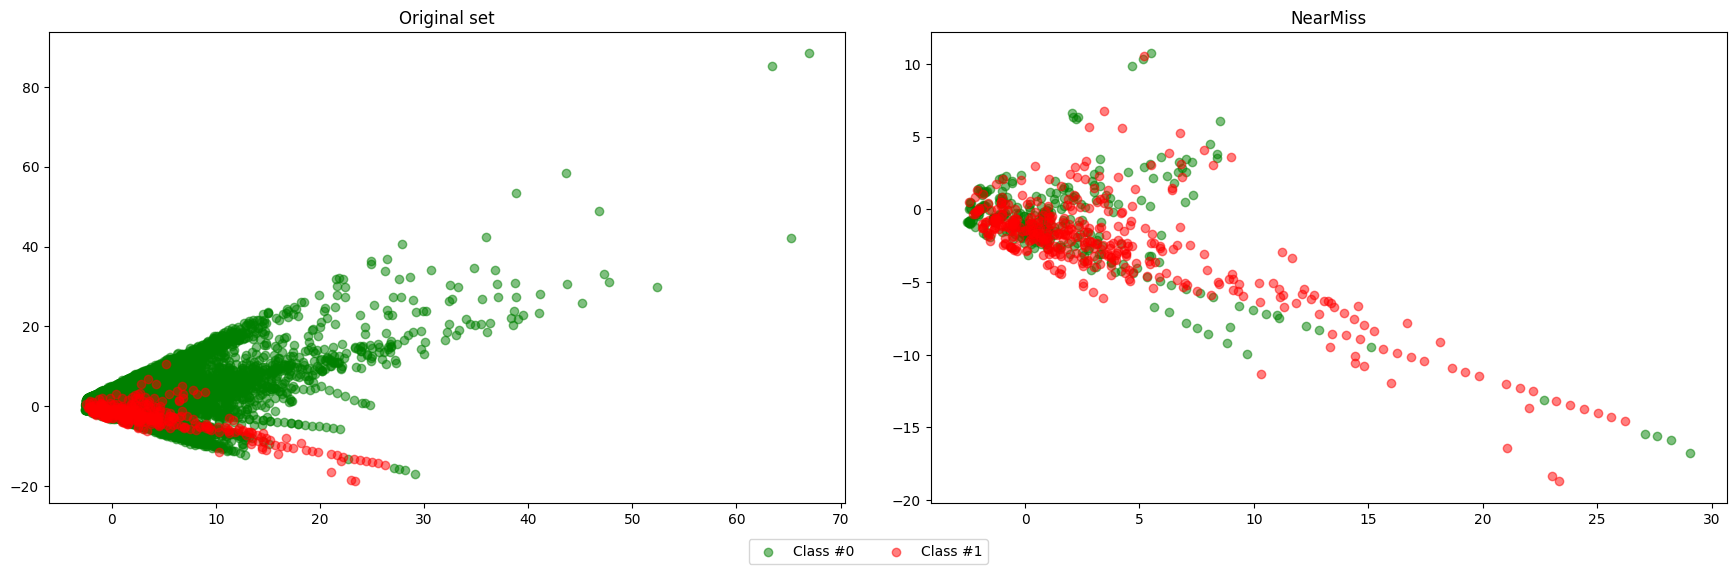

In [49]:
# 1. Handeling imbalanced dataset by appling Sampling method on the training dataset
# 2. plot the data before and after sampling
SampleName = 'NearMiss'
X_SampleTrain, y_SampleTrain =  Sampling_UnbalancedData( X_train, y_train , SampleName)

PlotDataAfterSampling( X_train, y_train, X_SampleTrain, y_SampleTrain, SampleName)


In [50]:
# Apply ML model & #Evaluation the Model
#===============================================================
# 1. Apply MachineLearning Model 
# 2. Evaluation the ML Model
#===============================================================


# 1. Logistic Regression- LR
Predict_LR, probs_LR = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'LR')
NM_Test_Accuracy_lr = MLModel_Evaluation(Predict_LR, y_test, ModelName='LogisticRegression', ShowReport = False, ConfusionMatrix=False)#
print("="*100)

# 2.Random Forest -RF
Predict_RF, probs_RF = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'RF')
NM_Test_Accuracy_rf = MLModel_Evaluation(Predict_RF, y_test, ModelName='RandomForest', ShowReport = False, ConfusionMatrix=False)
print("="*100)

# 3. Decision Tree -DT
Predict_DT, probs_DT = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'DT')
NM_Test_Accuracy_dt = MLModel_Evaluation(Predict_DT, y_test, ModelName='DecisionTree', ShowReport = False, ConfusionMatrix=False)
print("="*100)

# 4.Support Vector Machine -SVM
Predict_svmach, probs_SVM = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'SVM')
NM_Test_Accuracy_svmach = MLModel_Evaluation(Predict_svmach, y_test, ModelName='Support Vector Machine',  ShowReport = False, ConfusionMatrix=False)
print("="*100)

# 5. KNeighborsClassifier KNN
Predict_KNN, probs_KNN = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'KNN')
NM_Test_Accuracy_knn = MLModel_Evaluation(Predict_KNN, y_test, ModelName='KNeighborsClassifier', ShowReport = False, ConfusionMatrix=False)
print("="*100)

# 6. GradientBoostingClassifier GBT
Predict_GBT, probs_GBT = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'GBT')
NM_Test_Accuracy_gbt = MLModel_Evaluation(Predict_GBT, y_test, ModelName='GradientBoostingClassifier', ShowReport = False, ConfusionMatrix=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MachineLearning Model: LogisticRegression
Accuracy:  0.8994807208815997
Precision_Score:  0.011835692736133673
Recall_Score:  0.7183098591549296
F1_Score:  0.9454727710241755


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


MachineLearning Model: RandomForestClassifier
Accuracy:  0.9972978688409032
Precision_Score:  0.35333333333333333
Recall_Score:  0.7464788732394366
F1_Score:  0.997779571715251
MachineLearning Model: DecisionTree
Accuracy:  0.7116943537207171
Precision_Score:  0.004468275245755138
Recall_Score:  0.7746478873239436
F1_Score:  0.8299403491189072
[LibSVM]MachineLearning Model: Support Vector Machine
Accuracy:  0.9460043704034399
Precision_Score:  0.02271753107586798
Recall_Score:  0.7464788732394366
F1_Score:  0.9706691564993097
MachineLearning Model: KNeighborsClassifier
Accuracy:  0.9920110904861487
Precision_Score:  0.13746630727762804
Recall_Score:  0.7183098591549296
F1_Score:  0.99470810685342
MachineLearning Model: GradientBoostingClassifier
Accuracy:  0.9802391973495618
Precision_Score:  0.05747126436781609
Recall_Score:  0.704225352112676
F1_Score:  0.9885348297446233


### Evaluation & Comparision ML Models for Near miss under sampling

In [51]:
# Storing new accuracies for near miss undersampling
#NMTest_Accuracy = [NMTest_accuracy_lr[0], NMTest_accuracy_SVM[0], NMTest_accuracy_rf[0], NMTest_accuracy_dt[0]]

NMTable = pd.DataFrame({
    'Model': ["LR", "RF", "DT", "SVM", "KNN", "GBT"],
    'Accuracy_Score': [NM_Test_Accuracy_lr[0], NM_Test_Accuracy_rf[0], NM_Test_Accuracy_dt[0], NM_Test_Accuracy_svmach[0], NM_Test_Accuracy_knn[0], NM_Test_Accuracy_gbt[0]],
    'Precision_Score': [NM_Test_Accuracy_lr[1], NM_Test_Accuracy_rf[1], NM_Test_Accuracy_dt[1], NM_Test_Accuracy_svmach[1], NM_Test_Accuracy_knn[1], NM_Test_Accuracy_gbt[1]],
    'Recall_Score': [NM_Test_Accuracy_lr[2], NM_Test_Accuracy_rf[2], NM_Test_Accuracy_dt[2], NM_Test_Accuracy_svmach[2],NM_Test_Accuracy_knn[2], NM_Test_Accuracy_gbt[2]],
    'F1_Score': [NM_Test_Accuracy_lr[3], NM_Test_Accuracy_rf[3], NM_Test_Accuracy_dt[3], NM_Test_Accuracy_svmach[3], NM_Test_Accuracy_knn[3], NM_Test_Accuracy_gbt[3]]})

print('MODEL COMPARISON for *near miss Sampling*')
NMTable.sort_values(by='F1_Score', ascending=False)

MODEL COMPARISON for *near miss Sampling*


,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
1,RF,0.997298,0.353333,0.746479,0.997780
4,KNN,0.992011,0.137466,0.718310,0.994708
5,GBT,0.980239,0.057471,0.704225,0.988535
3,SVM,0.946004,0.022718,0.746479,0.970669
0,LR,0.899481,0.011836,0.718310,0.945473
2,DT,0.711694,0.004468,0.774648,0.829940


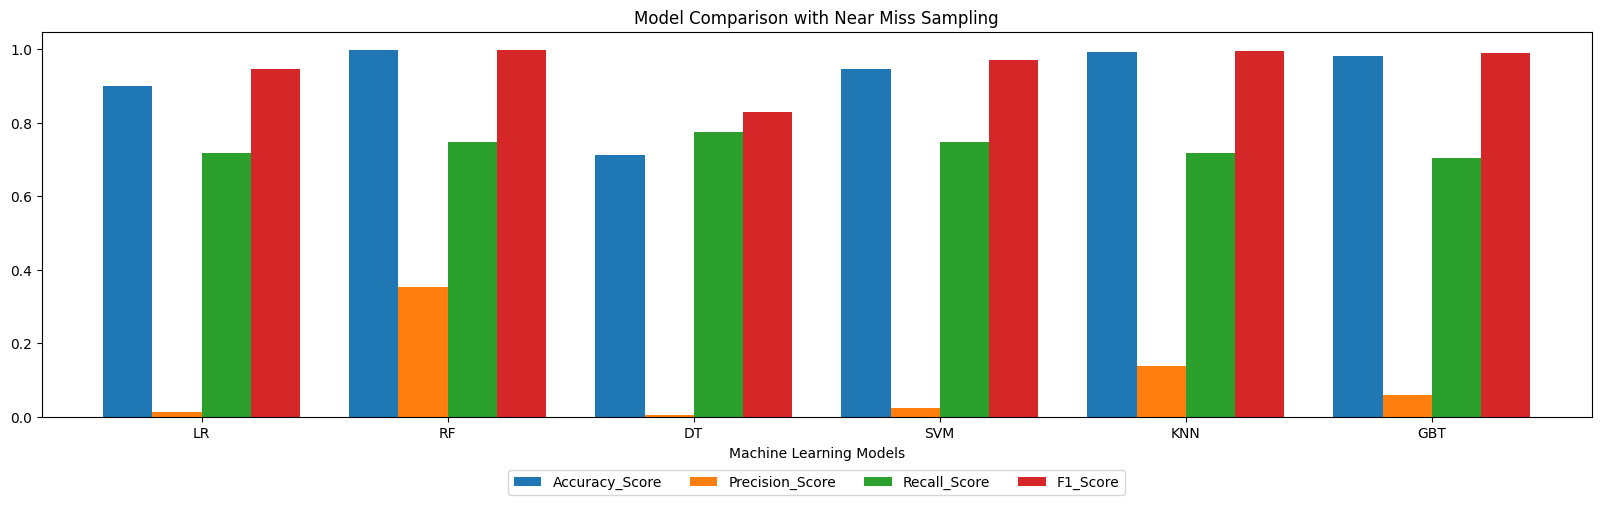

In [97]:
ax = NMTable.plot.bar(rot=0,figsize=(20,5),width=.8,title= "Model Comparison with Near Miss Sampling")
ax.set_xticklabels(NMTable['Model'])
ax.set_xlabel('Machine Learning Models')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=False, ncol=4)

At Nearmiss under sampling, we can notice that F-1 score is still high but the recall is decreased. Precision for random forest has increased.

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_lr = roc_auc_score(y_test, probs_LR)
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_LR)

auc_dt = roc_auc_score(y_test, probs_DT)
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_DT)

auc_rf = roc_auc_score(y_test, probs_RF)
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_RF)

auc_svm = roc_auc_score(y_test, probs_SVM)
fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_SVM)

auc_knn = roc_auc_score(y_test, probs_KNN)
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_KNN)

auc_gbt = roc_auc_score(y_test, probs_GBT)
fpr_gbt, tpr_gbt, _ = roc_curve(y_test,probs_GBT)

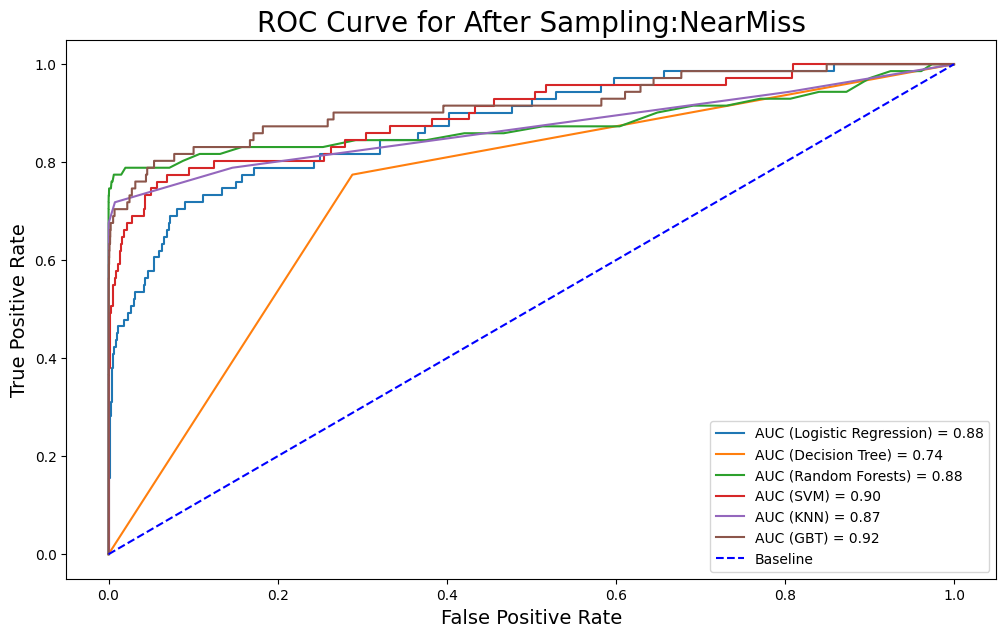

In [53]:
# plot AUC curve
plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'AUC (SVM) = {auc_svm:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {auc_knn:.2f}')
plt.plot(fpr_gbt, tpr_gbt, label=f'AUC (GBT) = {auc_gbt:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve for After Sampling:'+SampleName, size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()

The results for Near miss sampling are not quite good .The score of most of the machine learning model has decreased significantly such as Decision tree.

#### Apply Sampling 'SVMSMOTE' on the Training data

Handling unbalanced data by:  SVMSMOTE
----------------------------------------------------------------------------------------------------
Apply  SVMSMOTE
Before sampling Training Data , class count:
 0    240765
1       402
Name: Class, dtype: int64
----------------------------------------------------------------------------------------------------
After sampling Training Data with, SVMSMOTE class count:
 0    240765
1    240765
Name: Class, dtype: int64


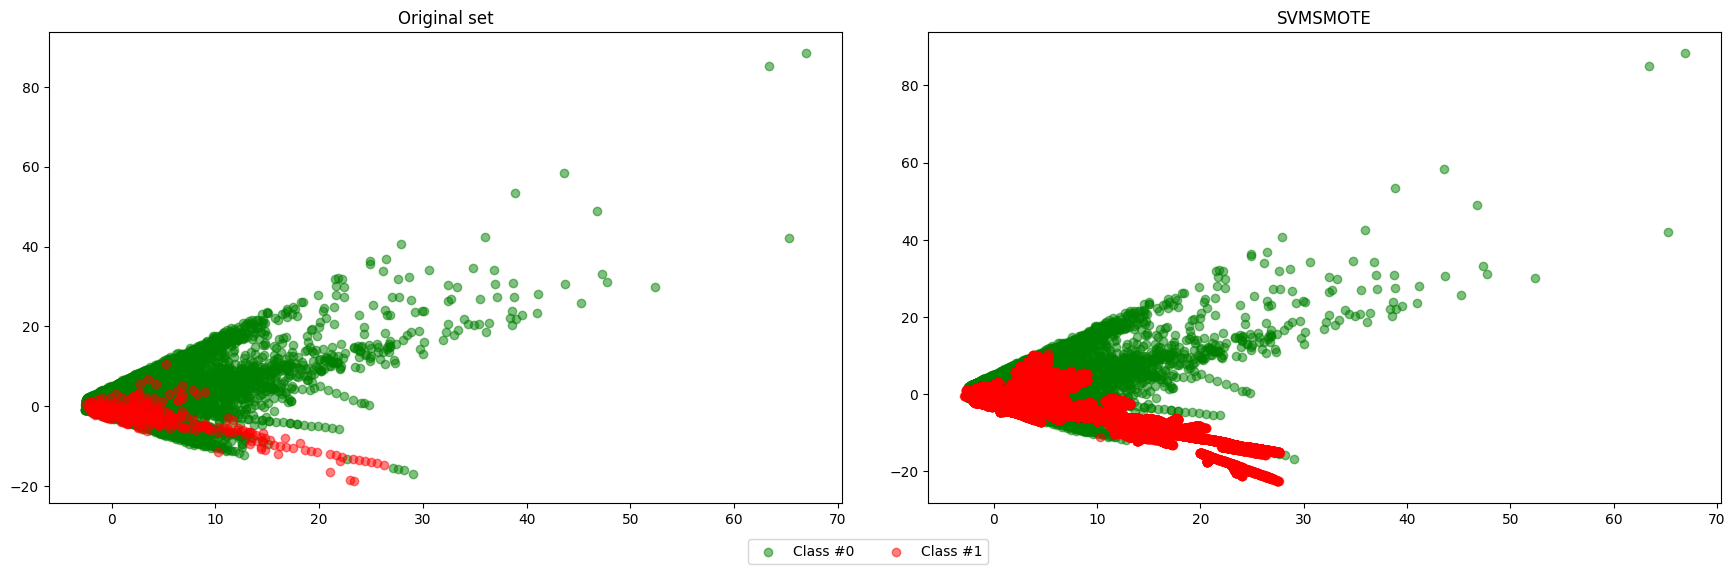

In [54]:
# 1. Handeling imbalanced dataset by appling Sampling method on the training dataset
# 2. plot the data before and after sampling
SampleName = 'SVMSMOTE'
X_SampleTrain, y_SampleTrain =  Sampling_UnbalancedData( X_train, y_train , SampleName)

PlotDataAfterSampling( X_train, y_train, X_SampleTrain, y_SampleTrain, SampleName)

In [55]:
# Apply ML model & #Evaluation the Model 
#===============================================================
# 1. Apply MachineLearning Model 
# 2. Evaluation the ML Model
#===============================================================


# 1. Logistic Regression- LR
Predict_LR, probs_LR = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'LR')
NM_Test_Accuracy_lr = MLModel_Evaluation(Predict_LR, y_test, ModelName='LogisticRegression', ShowReport = False, ConfusionMatrix=False)#
print("="*100)

# 2.Random Forest -RF
Predict_RF, probs_RF = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'RF')
NM_Test_Accuracy_rf = MLModel_Evaluation(Predict_RF, y_test, ModelName='RandomForest', ShowReport = False, ConfusionMatrix=False)
print("="*100)

# 3. Decision Tree -DT
Predict_DT, probs_DT = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'DT')
NM_Test_Accuracy_dt = MLModel_Evaluation(Predict_DT, y_test, ModelName='DecisionTree', ShowReport = False, ConfusionMatrix=False)
print("="*100)

# 4.Support Vector Machine -SVM
Predict_svmach, probs_SVM = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'SVM')
NM_Test_Accuracy_svmach = MLModel_Evaluation(Predict_svmach, y_test, ModelName='Support Vector Machine',  ShowReport = False, ConfusionMatrix=False)
print("="*100)

# 5. KNeighborsClassifier KNN
Predict_KNN, probs_KNN = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'KNN')
NM_Test_Accuracy_knn = MLModel_Evaluation(Predict_KNN, y_test, ModelName='KNeighborsClassifier', ShowReport = False, ConfusionMatrix=False)
print("="*100)

# 6. GradientBoostingClassifier GBT
Predict_GBT, probs_GBT = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'GBT')
NM_Test_Accuracy_gbt = MLModel_Evaluation(Predict_GBT, y_test, ModelName='GradientBoostingClassifier', ShowReport = False, ConfusionMatrix=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MachineLearning Model: LogisticRegression
Accuracy:  0.9921285744495877
Precision_Score:  0.15263157894736842
Recall_Score:  0.8169014084507042
F1_Score:  0.9948107411863492


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


MachineLearning Model: RandomForestClassifier
Accuracy:  0.9994830705608685
Precision_Score:  0.9016393442622951
Recall_Score:  0.7746478873239436
F1_Score:  0.9994635203129184
MachineLearning Model: DecisionTree
Accuracy:  0.9988956507436735
Precision_Score:  0.6428571428571429
Recall_Score:  0.7605633802816901
F1_Score:  0.9989418776770861
[LibSVM]MachineLearning Model: Support Vector Machine
Accuracy:  0.9927629878521582
Precision_Score:  0.16619718309859155
Recall_Score:  0.8309859154929577
F1_Score:  0.9951631911993851
MachineLearning Model: KNeighborsClassifier
Accuracy:  0.9992246058413027
Precision_Score:  0.75
Recall_Score:  0.8028169014084507
F1_Score:  0.9992377700032966
MachineLearning Model: GradientBoostingClassifier
Accuracy:  0.997908785450786
Precision_Score:  0.43283582089552236
Recall_Score:  0.8169014084507042
F1_Score:  0.9982293426445679


In [56]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_lr = roc_auc_score(y_test, probs_LR)
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_LR)

auc_dt = roc_auc_score(y_test, probs_DT)
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_DT)

auc_rf = roc_auc_score(y_test, probs_RF)
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_RF)

auc_svm = roc_auc_score(y_test, probs_SVM)
fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_SVM)

auc_knn = roc_auc_score(y_test, probs_KNN)
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_KNN)

auc_gbt = roc_auc_score(y_test, probs_GBT)
fpr_gbt, tpr_gbt, _ = roc_curve(y_test,probs_GBT)

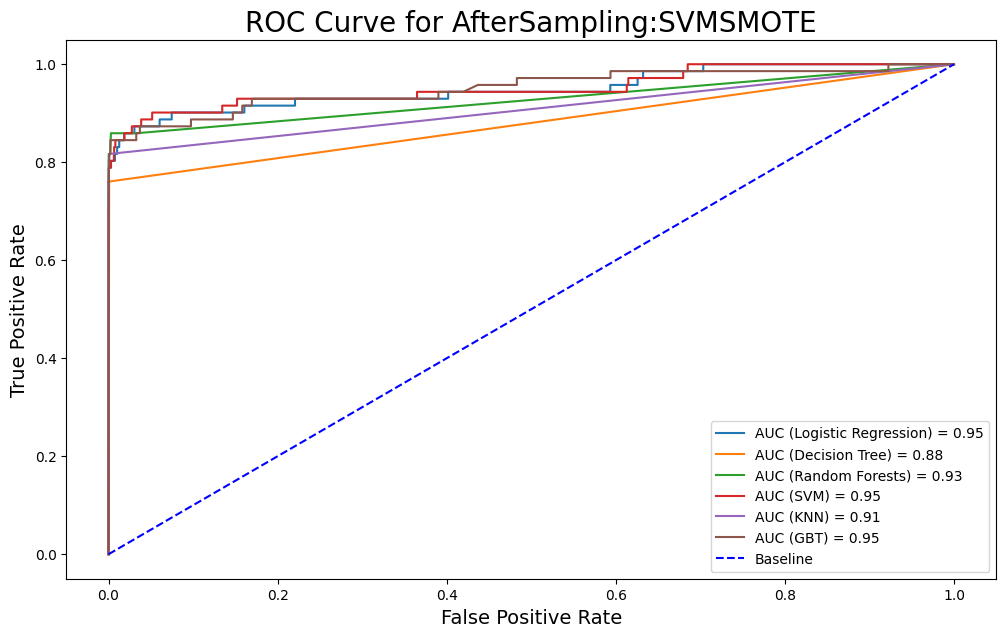

In [57]:
# plot AUC curve
plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'AUC (SVM) = {auc_svm:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {auc_knn:.2f}')
plt.plot(fpr_gbt, tpr_gbt, label=f'AUC (GBT) = {auc_gbt:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve for AfterSampling:'+SampleName, size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()

- When we Apply SVMSMOTE Oversampling we compare the ROC curve for all machine learning models, we got fairly good score for almost all the models.

### Evaluation & Comparision ML Models for SVMSMOTE

In [71]:
# Storing new accuracies for SVMSMOTE
SVMSMOTE_SampleTable = pd.DataFrame({
    'Model': ["LR", "RF", "DT", "SVM", "KNN", "GBT"],
    'Accuracy_Score': [NM_Test_Accuracy_lr[0], NM_Test_Accuracy_rf[0], NM_Test_Accuracy_dt[0], NM_Test_Accuracy_svmach[0], NM_Test_Accuracy_knn[0], NM_Test_Accuracy_gbt[0]],
    'Precision_Score': [NM_Test_Accuracy_lr[1], NM_Test_Accuracy_rf[1], NM_Test_Accuracy_dt[1], NM_Test_Accuracy_svmach[1], NM_Test_Accuracy_knn[1], NM_Test_Accuracy_gbt[1]],
    'Recall_Score': [NM_Test_Accuracy_lr[2], NM_Test_Accuracy_rf[2], NM_Test_Accuracy_dt[2], NM_Test_Accuracy_svmach[2],NM_Test_Accuracy_knn[2], NM_Test_Accuracy_gbt[2]],
    'F1_Score': [NM_Test_Accuracy_lr[3], NM_Test_Accuracy_rf[3], NM_Test_Accuracy_dt[3], NM_Test_Accuracy_svmach[3], NM_Test_Accuracy_knn[3], NM_Test_Accuracy_gbt[3]]})

print('MODEL COMPARISON for *SVMSMOTE_SampleTable Sampling*')
SVMSMOTE_SampleTable.sort_values(by='F1_Score', ascending=False)

MODEL COMPARISON for *SVMSMOTE_SampleTable Sampling*


,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
1,RF,0.999272,0.770270,0.802817,0.999279
5,GBT,0.993820,0.190323,0.830986,0.995750
4,KNN,0.993797,0.193651,0.859155,0.995748
2,DT,0.992763,0.160458,0.788732,0.995146
3,SVM,0.991659,0.148515,0.845070,0.994566
0,LR,0.988299,0.111111,0.859155,0.992776


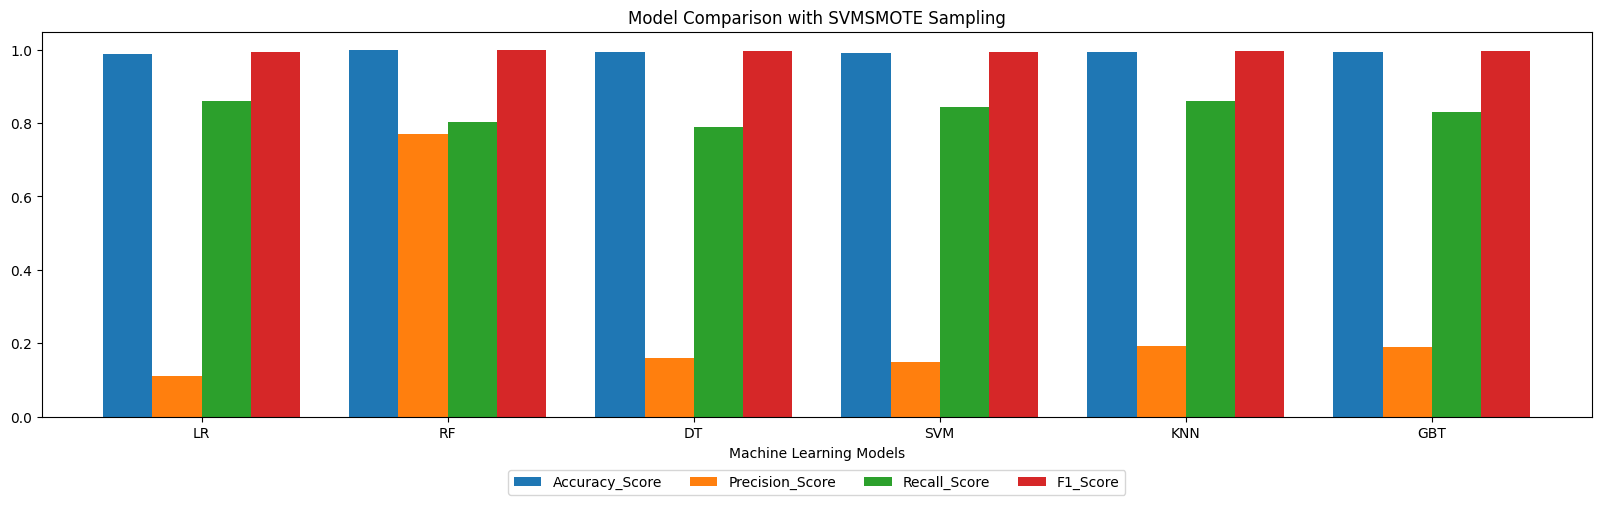

In [98]:
ax = SVMSMOTE_SampleTable.plot.bar(rot=0,figsize=(20,5),width=.8,title= "Model Comparison with SVMSMOTE Sampling")
ax.set_xticklabels(SVMSMOTE_SampleTable['Model'])
ax.set_xlabel('Machine Learning Models')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=False, ncol=4)


At SVMSMOTE over sampling, we can notice that F-1 score is still high but the recall is quite good.We have a higher prescion for the random forest, also for the other model ,it has increased but not up to the mark. 

#### Apply Sampling Over_undersampling method on the Training data

Handling unbalanced data by:  Over_underSampling
----------------------------------------------------------------------------------------------------
Apply  Over_underSampling
Before sampling Training Data , class count:
 0    240765
1       402
Name: Class, dtype: int64
----------------------------------------------------------------------------------------------------
After sampling Training Data with, Over_underSampling class count:
 0    48152
1    24076
Name: Class, dtype: int64


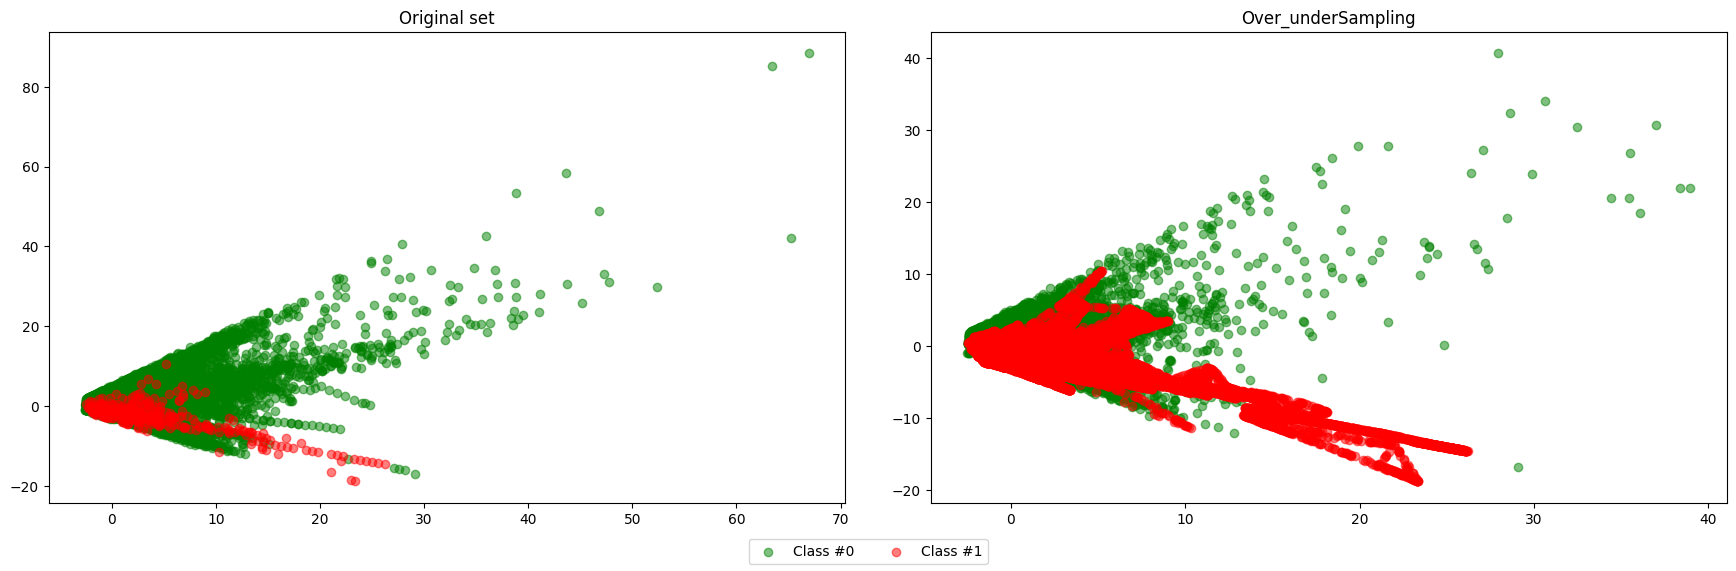

In [59]:
# 1. Handeling imbalanced dataset by appling Sampling method on the training dataset
# 2. plot the data before and after sampling
SampleName = 'Over_underSampling'
X_SampleTrain, y_SampleTrain =  Sampling_UnbalancedData( X_train, y_train , SampleName)

PlotDataAfterSampling( X_train, y_train, X_SampleTrain, y_SampleTrain, SampleName)

In [60]:
# Apply ML model & #Evaluation the Model 
#===============================================================
# 1. Apply MachineLearning Model 
# 2. Evaluation the ML Model
#===============================================================

# 1. Logistic Regression- LR
Predict_LR, probs_LR = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'LR')
NM_Test_Accuracy_lr = MLModel_Evaluation(Predict_LR, y_test, ModelName='LogisticRegression', ShowReport = False, ConfusionMatrix=False)#
print("="*100)

# 2.Random Forest -RF
Predict_RF, probs_RF = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'RF')
NM_Test_Accuracy_rf = MLModel_Evaluation(Predict_RF, y_test, ModelName='RandomForest', ShowReport = False, ConfusionMatrix=False)
print("="*100)

# 3. Decision Tree -DT
Predict_DT, probs_DT = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'DT')
NM_Test_Accuracy_dt = MLModel_Evaluation(Predict_DT, y_test, ModelName='DecisionTree', ShowReport = False, ConfusionMatrix=False)
print("="*100)

# 4.Support Vector Machine -SVM
Predict_svmach, probs_SVM = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'SVM')
NM_Test_Accuracy_svmach = MLModel_Evaluation(Predict_svmach, y_test, ModelName='Support Vector Machine',  ShowReport = False, ConfusionMatrix=False)
print("="*100)

# 5. KNeighborsClassifier KNN
Predict_KNN, probs_KNN = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'KNN')
NM_Test_Accuracy_knn = MLModel_Evaluation(Predict_KNN, y_test, ModelName='KNeighborsClassifier', ShowReport = False, ConfusionMatrix=False)
print("="*100)

# 6. GradientBoostingClassifier GBT
Predict_GBT, probs_GBT = ApplyML_Model(X_SampleTrain, y_SampleTrain, Model = 'GBT')
NM_Test_Accuracy_gbt = MLModel_Evaluation(Predict_GBT, y_test, ModelName='GradientBoostingClassifier', ShowReport = False, ConfusionMatrix=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MachineLearning Model: LogisticRegression
Accuracy:  0.9882985972414765
Precision_Score:  0.1111111111111111
Recall_Score:  0.8591549295774648
F1_Score:  0.9927762022139648


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   27.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


MachineLearning Model: RandomForestClassifier
Accuracy:  0.9992715994266782
Precision_Score:  0.7702702702702703
Recall_Score:  0.8028169014084507
F1_Score:  0.9992791217468108
MachineLearning Model: DecisionTree
Accuracy:  0.9927629878521582
Precision_Score:  0.16045845272206305
Recall_Score:  0.7887323943661971
F1_Score:  0.9951462174123553
[LibSVM]MachineLearning Model: Support Vector Machine
Accuracy:  0.9916586385958317
Precision_Score:  0.1485148514851485
Recall_Score:  0.8450704225352113
F1_Score:  0.9945660971082064
MachineLearning Model: KNeighborsClassifier
Accuracy:  0.9937968467304213
Precision_Score:  0.19365079365079366
Recall_Score:  0.8591549295774648
F1_Score:  0.9957484973419702
MachineLearning Model: GradientBoostingClassifier
Accuracy:  0.9938203435231091
Precision_Score:  0.19032258064516128
Recall_Score:  0.8309859154929577
F1_Score:  0.995749867399653


### Evaluation & Comparision ML Models for Over_UnderSampleTable

In [61]:
# Storing new accuracies for Over_UnderSampleTable

Over_UTable = pd.DataFrame({
    'Model': ["LR", "RF", "DT", "SVM", "KNN", "GBT"],
    'Accuracy_Score': [NM_Test_Accuracy_lr[0], NM_Test_Accuracy_rf[0], NM_Test_Accuracy_dt[0], NM_Test_Accuracy_svmach[0], NM_Test_Accuracy_knn[0], NM_Test_Accuracy_gbt[0]],
    'Precision_Score': [NM_Test_Accuracy_lr[1], NM_Test_Accuracy_rf[1], NM_Test_Accuracy_dt[1], NM_Test_Accuracy_svmach[1], NM_Test_Accuracy_knn[1], NM_Test_Accuracy_gbt[1]],
    'Recall_Score': [NM_Test_Accuracy_lr[2], NM_Test_Accuracy_rf[2], NM_Test_Accuracy_dt[2], NM_Test_Accuracy_svmach[2],NM_Test_Accuracy_knn[2], NM_Test_Accuracy_gbt[2]],
    'F1_Score': [NM_Test_Accuracy_lr[3], NM_Test_Accuracy_rf[3], NM_Test_Accuracy_dt[3], NM_Test_Accuracy_svmach[3], NM_Test_Accuracy_knn[3], NM_Test_Accuracy_gbt[3]]})

print('MODEL COMPARISON for *SMOTE_UnderSampleTable Sampling*')
Over_UTable.sort_values(by='F1_Score', ascending=False)

MODEL COMPARISON for *SMOTE_UnderSampleTable Sampling*


,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
1,RF,0.999272,0.770270,0.802817,0.999279
5,GBT,0.993820,0.190323,0.830986,0.995750
4,KNN,0.993797,0.193651,0.859155,0.995748
2,DT,0.992763,0.160458,0.788732,0.995146
3,SVM,0.991659,0.148515,0.845070,0.994566
0,LR,0.988299,0.111111,0.859155,0.992776


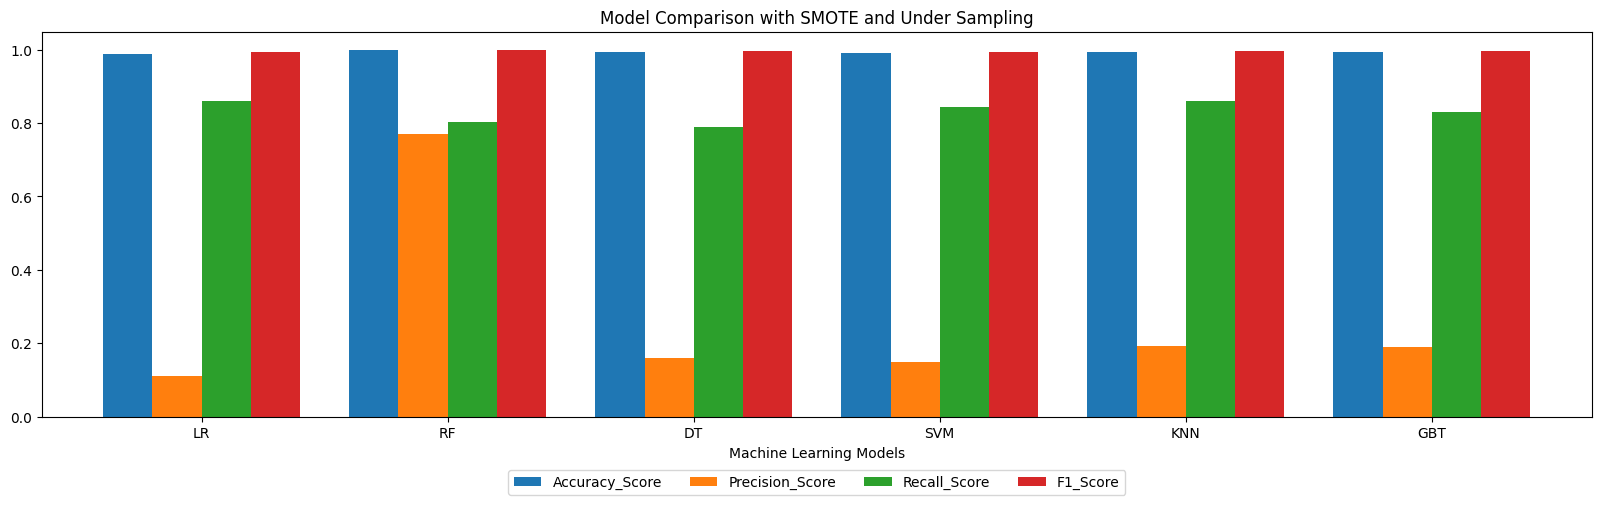

In [100]:
ax = Over_UTable.plot.bar(rot=0,figsize=(20,5),width=.8,title= "Model Comparison with SMOTE and Under Sampling")
ax.set_xticklabels(Over_UTable['Model'])
ax.set_xlabel('Machine Learning Models')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12),
          fancybox=True, shadow=False, ncol=4)


At SMOTE-under sampling, we can notice that F-1 score is still high but the recall is quite good.We have a higher prescion for the random forest, also for the other model ,it has increased but not up to the mark. 

In [62]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_lr = roc_auc_score(y_test, probs_LR)
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_LR)

auc_dt = roc_auc_score(y_test, probs_DT)
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_DT)

auc_rf = roc_auc_score(y_test, probs_RF)
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_RF)

auc_svm = roc_auc_score(y_test, probs_SVM)
fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_SVM)

auc_knn = roc_auc_score(y_test, probs_KNN)
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_KNN)

auc_gbt = roc_auc_score(y_test, probs_GBT)
fpr_gbt, tpr_gbt, _ = roc_curve(y_test,probs_GBT)

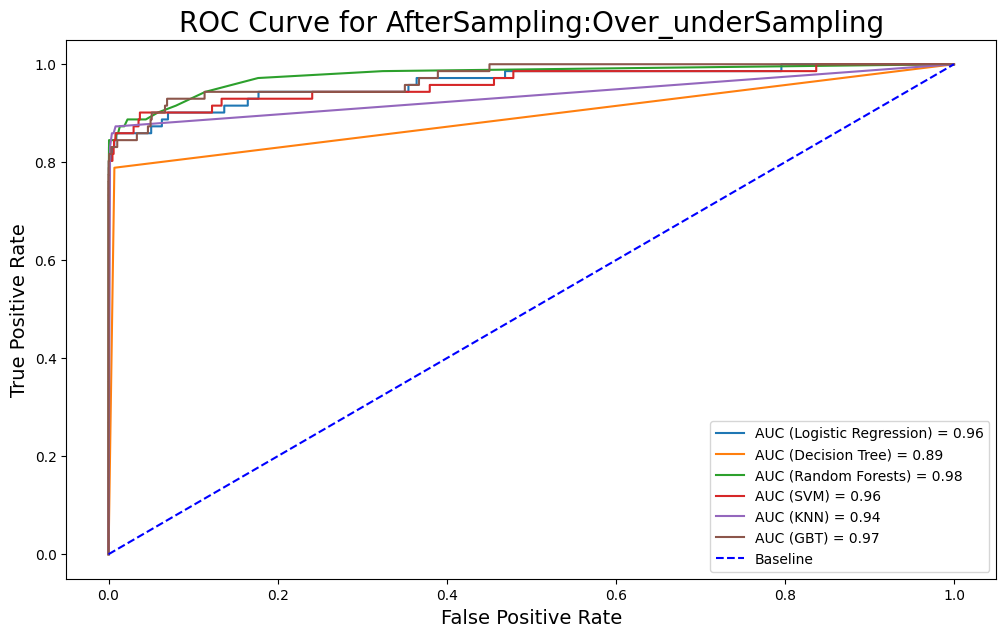

In [63]:
# plot AUC curve
plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_svm, tpr_svm, label=f'AUC (SVM) = {auc_svm:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {auc_knn:.2f}')
plt.plot(fpr_gbt, tpr_gbt, label=f'AUC (GBT) = {auc_gbt:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve for AfterSampling:'+SampleName, size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()

##### Result Discussion
The ROC curve after applying the sampling for different ML technique is shown in the plot above. As we see that most of the techniques perform quite well with an exception of decision tree. Overall the Random Forest performs the best but all other algorithms also perform quite well. The AUC is very near to 1.0 signifying that all the classification algorithms perform quite well. This is expected after the sampling and also as we observed during data exploration that the classes are well separated.  

#### Apply neural Network on the Data after sampling (Over_UnderSampleTable)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 32)                992       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,955
Trainable params: 1,955
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


c:\Users\Win10\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


903/903 - 2s - loss: 0.1076 - accuracy: 0.9612 - precision: 0.8879 - recall: 0.8780 - val_loss: 0.1895 - val_accuracy: 0.9105 - val_precision: 1.0000 - val_recall: 0.9105 - 2s/epoch - 2ms/step
Epoch 2/20
903/903 - 1s - loss: 0.0392 - accuracy: 0.9852 - precision: 0.9811 - recall: 0.9291 - val_loss: 0.0967 - val_accuracy: 0.9482 - val_precision: 1.0000 - val_recall: 0.9482 - 919ms/epoch - 1ms/step
Epoch 3/20
903/903 - 1s - loss: 0.0260 - accuracy: 0.9903 - precision: 0.9821 - recall: 0.9591 - val_loss: 0.0703 - val_accuracy: 0.9688 - val_precision: 1.0000 - val_recall: 0.9688 - 903ms/epoch - 1000us/step
Epoch 4/20
903/903 - 1s - loss: 0.0181 - accuracy: 0.9940 - precision: 0.9841 - recall: 0.9796 - val_loss: 0.0350 - val_accuracy: 0.9887 - val_precision: 1.0000 - val_recall: 0.9887 - 936ms/epoch - 1ms/step
Epoch 5/20
903/903 - 1s - loss: 0.0131 - accuracy: 0.9963 - precision: 0.9869 - recall: 0.9911 - val_loss: 0.0278 - val_accuracy: 0.9925 - val_precision: 1.0000 - val_recall: 0.9925 -

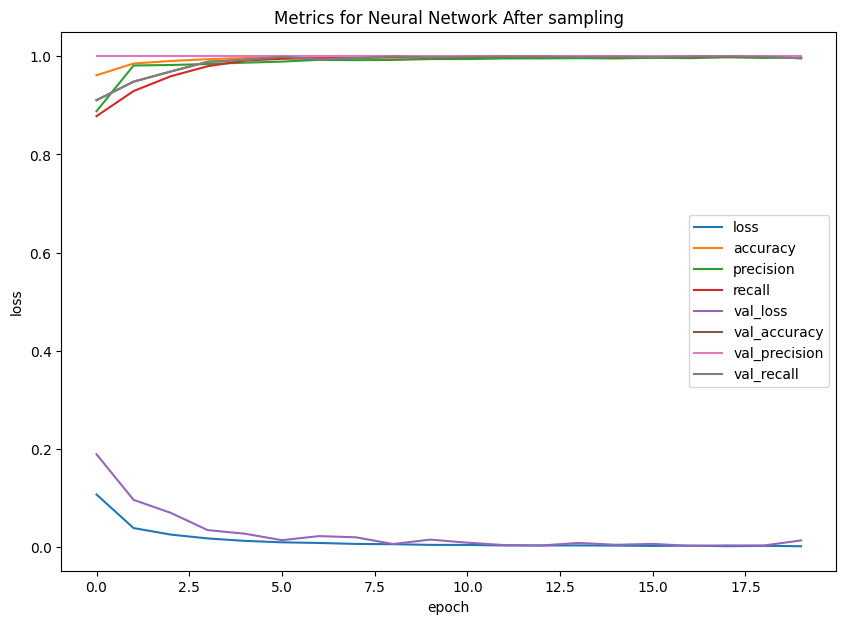

In [64]:
NN_model = BuildNeuralNetwork(X_SampleTrain.shape[1])

Loss, accuracy, percision, recall, history = Fitting_Evaluation(NN_model, X_SampleTrain, y_SampleTrain, X_test, y_test)

# plot all the Metrces in the Neural Network
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Metrics for Neural Network After sampling')
plt.show()



- The Neural Network model is better than the other models in all metrices (Accuracy, Recall, Precision and f1_score)

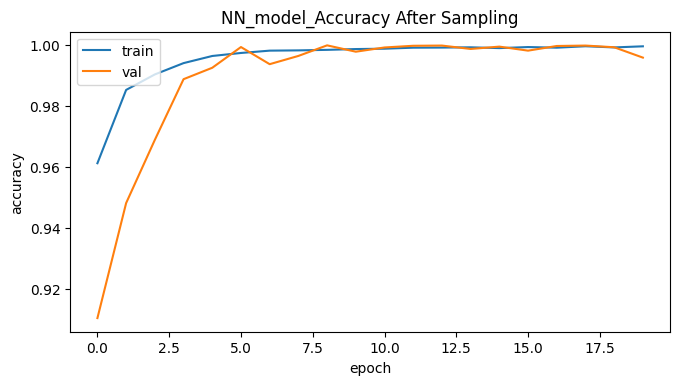

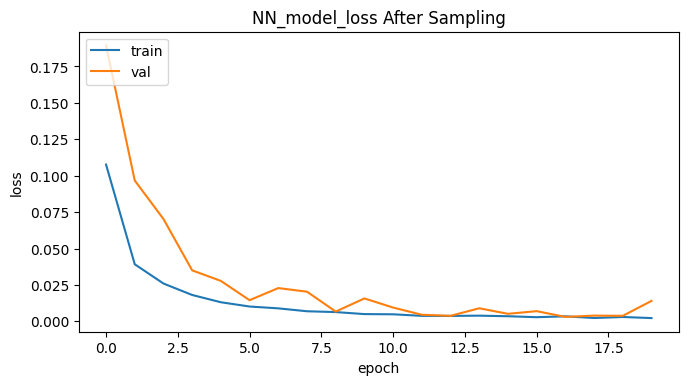

In [65]:
plotModel(history.history['accuracy'], history.history['val_accuracy'], 'epoch', 'accuracy','NN_model_Accuracy After Sampling')
plotModel(history.history['loss'], history.history['val_loss'], 'epoch', 'loss','NN_model_loss After Sampling')

The result in Neural network model is improved after sampling and there are no overfitting

#### Conclusion

In this project we build the core of a credit card fraud detection system using several techniques for Binary Classification Models and handling the imbalanced dataset with different methods (under sampling and oversampling).

We started our project by preprocessing & exploring the dataset, then we implemented the baseline and try to evaluate 3 machine learning models before manipulating the imbalanced data after that we compare roc_auc_score between the ML models. 
Then we split the dataset into training & testing sets and start Sampling the Training part with Random under sampling and apply all 6 Machine learning models. 
After evaluation and comparison we get the following results:

- All the ML algoritms perform very vell with more than 95% AUC showing great performance 
- By applying Neural network before sampling and after sampling . We get improvement in all the measurements F1_score, Recall, precision.

As per result, neural network gives better result than the normal machine learning model.

Further it needs to be noted, that the data given is just for a very short time frame of two days. Especially as the actual content of the V-features is unknown, both problems can lead to errors in the models when applied to different datasets for detecting fraud. On these two days very specific fraud actions might have happened, as well as unusual non-fraud activities, which might not be applicable a day later.